In [1]:
import pandas as pd
import urllib
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 15, 4

# <center>Tarea 3 Máquinas de Aprendizaje</center>

<center>
Patricio Horth M.<br>
Víctor Zúñiga M.<br>

22 de Diciembre de 2017
</center>

# 4. Imágenes de Lenguaje de Señas

El siguiente problema a tratar es la clasificación de imágenes, respecto a la representación de un subconjunto de letras del inglés en lenguaje de señas. Las imágenes estarán en escala de grises, y serán representadas en 784 características (una por cada pixel, dado que las imágenes son de 28x28 pixeles), donde cada celda entrá un valor entre 0 y 255 para representar la tonalidad de gris. Los *target* o etiquetas están representadas por un número entre 0 y 24 según su letra (se excluye J=9 y Z=25 ya que estas letras requieren hacer gestos, y no pueden ser representados por una imagen estática).

## a) Ingreso y análisis descriptivo de los datos

Se ingresarán los datos de entrada y se creará un conjunto de validación utilizando el 20% de los datos del conjunto de entrenamiento.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split


def load_data():
    train = pd.read_csv('sign_mnist_train.csv')
    test = pd.read_csv('sign_mnist_test.csv')
    y_tr = train['label']
    x_tr = train.iloc[:,1:]
    y_t = test['label']
    x_t = test.iloc[:,1:]
    x_tr_two, x_v, y_tr_two, y_v = train_test_split(x_tr, y_tr, test_size=0.2, random_state=2)
    print("Y training")
    print(y_tr_two.describe())
    print("\nY validation")
    print(y_v.describe())
    print("\nY testing")
    print(y_t.describe())
    
    
    return(x_tr_two,x_v,x_t,y_tr_two,y_v,y_t)


x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()

Y training
count    21964.000000
mean        12.340056
std          7.296453
min          0.000000
25%          6.000000
50%         13.000000
75%         19.000000
max         24.000000
Name: label, dtype: float64

Y validation
count    5491.000000
mean       12.233837
std         7.251879
min         0.000000
25%         6.000000
50%        13.000000
75%        18.000000
max        24.000000
Name: label, dtype: float64

Y testing
count    7172.000000
mean       11.247351
std         7.446712
min         0.000000
25%         4.000000
50%        11.000000
75%        18.000000
max        24.000000
Name: label, dtype: float64


Dado a que es un problema de clasificación, se debe revisar que las clases estén balanceadas.

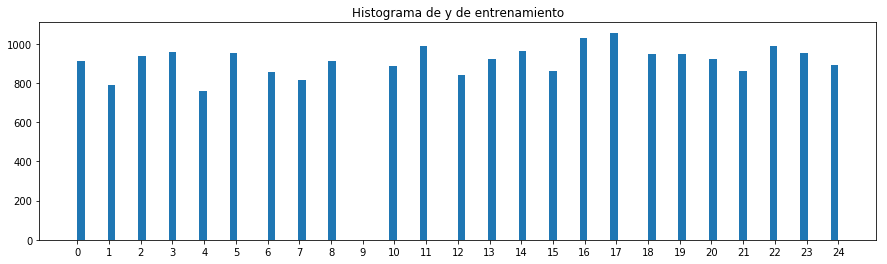

In [3]:
from matplotlib.pylab import hist, show
from pylab import rcParams
rcParams['figure.figsize'] = 15, 4

plt.title("Histograma de y de entrenamiento")
plt.hist(y_tr,bins=100)
plt.xticks(range(0,25))
plt.show()

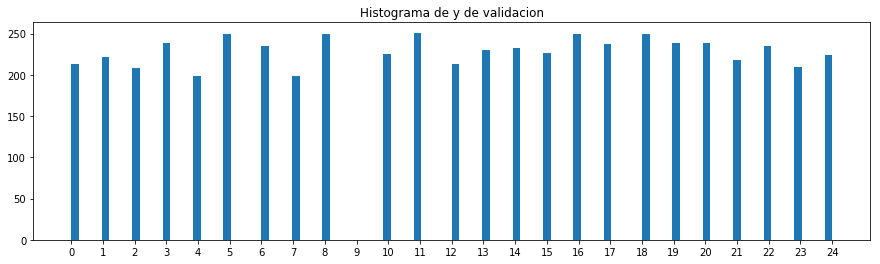

In [4]:
from matplotlib.pylab import hist, show
from pylab import rcParams
rcParams['figure.figsize'] = 15, 4

plt.title("Histograma de y de validacion")
plt.hist(y_v,bins=100)
plt.xticks(range(0,25))
plt.show()

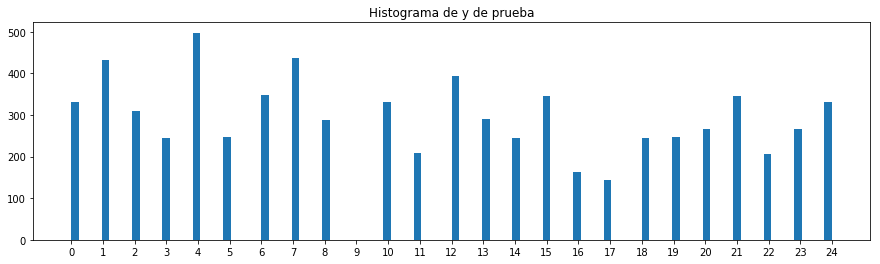

In [5]:
from matplotlib.pylab import hist, show
from pylab import rcParams
rcParams['figure.figsize'] = 15, 4

plt.title("Histograma de y de prueba")
plt.hist(y_t,bins=100)
plt.xticks(range(0,25))
plt.show()

Tenemos clases relativamente balanceadas en los conjuntos de entrenamiento y de validación. Para terminar esta sección, se revisarán las descripciones y algunos datos de X e Y del conjunto de entrenamiento.

In [8]:
x_tr.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,...,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000
mean,145.315425,148.399973,151.177108,153.510199,156.160080,158.338326,160.400474,162.269760,163.882398,165.455427,...,141.187944,147.628938,153.461027,159.227008,162.075487,162.888363,163.107949,162.155983,161.246085,159.896285
std,41.209421,39.802453,38.836225,38.290959,36.869741,35.931102,34.858420,33.494483,32.495129,31.144656,...,63.725485,65.431314,64.418657,63.628838,63.666644,63.284134,63.324200,63.187234,63.521965,64.340061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,145.000000,146.000000,148.000000,...,92.000000,96.000000,103.000000,112.000000,120.750000,125.000000,128.000000,128.000000,128.000000,126.000000
50%,150.000000,153.000000,155.000000,158.000000,160.000000,162.000000,163.000000,165.000000,166.000000,167.000000,...,144.000000,163.000000,173.000000,180.000000,183.000000,184.000000,184.000000,183.000000,182.000000,182.000000
75%,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,205.000000,204.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [9]:
x_tr.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
15521,178,181,182,183,186,186,188,190,190,189,...,209,208,207,207,206,206,205,204,202,201
9897,148,150,152,153,154,155,154,154,155,155,...,185,186,185,184,183,181,179,175,178,140
26713,197,197,198,199,198,198,197,199,200,199,...,124,151,160,163,167,176,179,174,181,189
23652,176,177,177,179,179,178,179,177,177,178,...,0,0,0,0,0,0,16,0,0,0
13417,96,100,104,110,116,121,129,135,141,145,...,218,211,215,219,220,221,221,223,224,223


In [7]:
y_tr.describe()

count    21964.000000
mean        12.340056
std          7.296453
min          0.000000
25%          6.000000
50%         13.000000
75%         19.000000
max         24.000000
Name: label, dtype: float64

In [10]:
y_tr.head()

15521    13
9897      7
26713     7
23652    14
13417     5
Name: label, dtype: int64

## b) Preprocesamiento de los datos

Es posible que esta representación de datos de entrada no sea la adecuada para los modelos que se crearán más adelante. Muchos modelos funcionan mejor utilizando datos centrados en 0 y en escalas pequeñas y reales, como $[-1,1]$. [Standardization]

Se definirán 3 representaciones de los datos:

* *x_tr, x_v, x_t*: los datos sin preprocesamiento
* *X_train, X_val, X_test*: los datos escalados a $[0,1]$
* *df_train_std, df_val_std, df_test_std*: los datos estandarizados utilizando StandardScaler()

### Datos escalados

Para obtener la segunda representación, se dividirá cada celda por 255 para que estén en un rango $[0,1]$.

In [6]:
X_train = x_tr / 255
X_val = x_v / 255 
X_test = x_t / 255

In [7]:
X_train.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,...,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000,21964.000000
mean,0.569864,0.581961,0.592851,0.602001,0.612392,0.620935,0.629021,0.636352,0.642676,0.648845,...,0.553678,0.578937,0.601808,0.624420,0.635590,0.638778,0.639639,0.635906,0.632338,0.627044
std,0.161606,0.156088,0.152299,0.150161,0.144587,0.140906,0.136700,0.131351,0.127432,0.122136,...,0.249904,0.256593,0.252622,0.249525,0.249673,0.248173,0.248330,0.247793,0.249106,0.252314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.474510,0.494118,0.509804,0.521569,0.537255,0.549020,0.556863,0.568627,0.572549,0.580392,...,0.360784,0.376471,0.403922,0.439216,0.473529,0.490196,0.501961,0.501961,0.501961,0.494118
50%,0.588235,0.600000,0.607843,0.619608,0.627451,0.635294,0.639216,0.647059,0.650980,0.654902,...,0.564706,0.639216,0.678431,0.705882,0.717647,0.721569,0.721569,0.717647,0.713725,0.713725
75%,0.682353,0.690196,0.698039,0.701961,0.709804,0.713725,0.717647,0.721569,0.725490,0.725490,...,0.768627,0.792157,0.803922,0.811765,0.815686,0.811765,0.811765,0.807843,0.803922,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
15521,0.698039,0.709804,0.713725,0.717647,0.729412,0.729412,0.737255,0.745098,0.745098,0.741176,...,0.819608,0.815686,0.811765,0.811765,0.807843,0.807843,0.803922,0.800000,0.792157,0.788235
9897,0.580392,0.588235,0.596078,0.600000,0.603922,0.607843,0.603922,0.603922,0.607843,0.607843,...,0.725490,0.729412,0.725490,0.721569,0.717647,0.709804,0.701961,0.686275,0.698039,0.549020
26713,0.772549,0.772549,0.776471,0.780392,0.776471,0.776471,0.772549,0.780392,0.784314,0.780392,...,0.486275,0.592157,0.627451,0.639216,0.654902,0.690196,0.701961,0.682353,0.709804,0.741176
23652,0.690196,0.694118,0.694118,0.701961,0.701961,0.698039,0.701961,0.694118,0.694118,0.698039,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062745,0.000000,0.000000,0.000000
13417,0.376471,0.392157,0.407843,0.431373,0.454902,0.474510,0.505882,0.529412,0.552941,0.568627,...,0.854902,0.827451,0.843137,0.858824,0.862745,0.866667,0.866667,0.874510,0.878431,0.874510


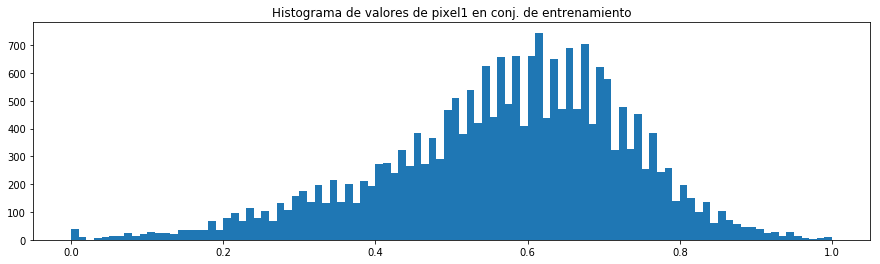

In [14]:
from matplotlib.pylab import hist, show
from pylab import rcParams
rcParams['figure.figsize'] = 15, 4

plt.title("Histograma de valores de pixel1 en conj. de entrenamiento")
plt.hist(X_train['pixel1'],bins=100)
plt.show()

### Datos normalizados con StandardScaler

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

df_train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
df_val_std = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
df_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [10]:
df_train_std.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,...,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04
mean,2.918354e-16,-4.420395e-16,3.531115e-17,7.673790e-17,-5.281634e-17,6.256706e-16,-3.544434e-16,5.630449e-16,-7.550391e-17,6.943140e-16,...,-6.793570e-17,-1.454148e-16,1.440803e-16,7.961215e-17,-3.121656e-16,1.447475e-16,-1.083382e-16,-1.355631e-16,-2.373049e-16,8.334255e-17
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,...,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-3.526347e+00,-3.728498e+00,-3.892771e+00,-4.009137e+00,-4.235550e+00,-4.406821e+00,-4.601589e+00,-4.844782e+00,-5.043406e+00,-5.312603e+00,...,-2.215615e+00,-2.256294e+00,-2.382299e+00,-2.502492e+00,-2.545747e+00,-2.573980e+00,-2.575819e+00,-2.566336e+00,-2.538488e+00,-2.485231e+00
25%,-5.900587e-01,-5.627915e-01,-5.453051e-01,-5.356530e-01,-5.196813e-01,-5.103863e-01,-5.278751e-01,-5.156119e-01,-5.503227e-01,-5.604758e-01,...,-7.718900e-01,-7.890735e-01,-7.833472e-01,-7.422434e-01,-6.491064e-01,-5.987160e-01,-5.544286e-01,-5.405643e-01,-5.233913e-01,-5.268422e-01
50%,1.136799e-01,1.155741e-01,9.843848e-02,1.172575e-01,1.041506e-01,1.019105e-01,7.457554e-02,8.151499e-02,6.516822e-02,4.959464e-02,...,4.412866e-02,2.349244e-01,3.033192e-01,3.264788e-01,3.286649e-01,3.336084e-01,3.299296e-01,3.298845e-01,3.267277e-01,3.435530e-01
75%,6.960842e-01,6.934411e-01,6.906825e-01,6.657024e-01,6.737364e-01,6.585440e-01,6.483381e-01,6.487855e-01,6.498846e-01,6.275561e-01,...,8.601473e-01,8.309828e-01,8.000810e-01,7.508243e-01,7.213441e-01,6.970569e-01,6.931481e-01,6.938904e-01,6.888155e-01,6.854939e-01
max,2.661699e+00,2.678289e+00,2.673413e+00,2.650550e+00,2.680848e+00,2.690256e+00,2.713883e+00,2.768586e+00,2.804103e+00,2.875184e+00,...,1.786015e+00,1.641011e+00,1.576271e+00,1.505216e+00,1.459581e+00,1.455558e+00,1.451169e+00,1.469381e+00,1.475963e+00,1.478175e+00


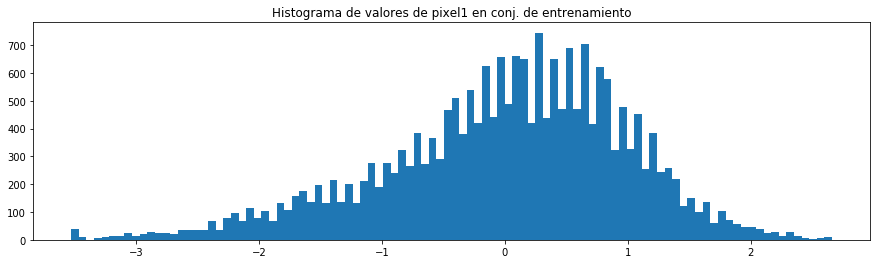

In [11]:
plt.title("Histograma de valores de pixel1 en conj. de entrenamiento")
plt.hist(df_train_std['pixel1'],bins=100)
plt.show()

Finalmente se obtienen datos centrados en 0 y con varianzas en el mismo orden de magnitud. La consecuencia de estas transformaciones se explorará más adelante.

## c) Red Neuronal Artificial: Multi-layer Perceptron

Para comenzar, se intentará hacer la clasificación con un Multi-layer Perceptron, la cual es una red neuronal artificial de tipo *feed forward* que coloca a un conjunto de perceptrones en varias capas. La idea es que, mediante un algoritmo de *backpropagation*, los datos de entrenamiento vayan actualizando los pesos de los perceptrones o nodos, y así se vayan estabilizando hasta poder crear una red que pueda tomar nuevos datos (en este caso, datos de prueba), y pasar por la red hasta obtener una representación de la clasificación (que en este caso, sería un valor 1 para el nodo final de la clase, y 0 para los otros nodos de otras clases). [MLP]

Para lograr esta representación de los *targets*, se utilizará la utilidad de Keras *to_categorical*, que transforma los valores de Y a un vector donde las componentes son las posibles clases, y pueden tener valor 0 o 1 según la clase del target original.

In [10]:
y_t.values[5]

21

In [11]:
from keras.utils.np_utils import to_categorical

to_categorical(y_t)[5]

Using TensorFlow backend.


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

### Red de tres capas para clasificación, datos sin preprocesamiento

A continuación se probará una red Multi-layer Perceptron con las siguientes características:

* Capas conectaradas en forma Densa (o sea, todos conectados con todos)
* Una 1ra capa de input, con 30 nodos o unidades, donde los pesos iniciales serán elegidos en una distribución aleatoria uniforme/rectangular (de probabilidad igual) en el conjunto $[-\sqrt{3/784}, \sqrt{3/784}]$, y tamaño de entrada 784 (784 es el número de características). La función de activación de los nodos será ReLU (función que es $f(x)=0$ para $x<0$ y una recta $f(x)=x$ para $x\geq0$)
* Una 2da capa escondida o *hidden*, de 30 nodos, pesos iniciales con distribución uniforme y activación ReLU
* Una 3ra capa de output, de 25 nodos (por las 25 posibles letras, incluyendo $J=9$), pesos iniciales con distribución uniforme y activación Softmax (exponencial normalizada).
* Como función de optimización (para obtener los pesos) se utiliza Stochastic Gradient Descent, con un learning rate de $0.05$. Como función de pérdida se utiliza Categorical Cross Entropy y como medida de puntaje o *score* se utiliza el acierto de clasificación ($1 -$ error de clasificación).
* Se harán 50 epochs (o sea, se pasarán todos los datos de entranmiento por la red 50 veces), y el batch_size será 64 (número de datos a utilizar en cada iteración de *backpropagation*)

Además, se le pasará inmediantemente el conjunto de validación al modelo Keras, para calcular inmediatamente la función de pérdida y el score en éste.

In [90]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

# Modelo secuencial (feed forward)
model = Sequential()

# input dim sera la cantidad de caracteristicas, 784
model.add(Dense(units=30, input_dim=x_tr.shape[1], kernel_initializer='uniform', activation='relu')) # Capa input
model.add(Dense(units=30, kernel_initializer='uniform', activation='relu')) # Capa hidden
model.add(Dense(units=25, kernel_initializer='uniform', activation='softmax')) # Capa output

model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_tr.values, to_categorical(y_tr), epochs=50, batch_size=64, verbose=1, validation_data=(x_v.values,to_categorical(y_v)))

Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - ETA: 0s - loss: 15.3868 - acc: 0.04 - 3s 137us/step - loss: 15.3912 - acc: 0.0430 - val_loss: 15.4195 - val_acc: 0.0433
Epoch 2/50
21964/21964 [==============================] - ETA: 0s - loss: 15.4287 - acc: 0.0428 ETA: 1s - loss: 15.4337 - acc: 0. - ETA: 0s - loss: 15.4413 - acc: 0. - ETA: 0s - loss: 15.4299 - acc: 0. - 3s 129us/step - loss: 15.4224 - acc: 0.0432 - val_loss: 15.4195 - val_acc: 0.0433
Epoch 3/50
21964/21964 [==============================] - 2s 94us/step - loss: 15.4224 - acc: 0.0432 - val_loss: 15.4195 - val_acc: 0.0433
Epoch 4/50
21964/21964 [==============================] - 1s 55us/step - loss: 15.4224 - acc: 0.0432 - val_loss: 15.4195 - val_acc: 0.0433
Epoch 5/50
21964/21964 [==============================] - 1s 54us/step - loss: 15.4224 - acc: 0.0432 - val_loss: 15.4195 - val_acc: 0.0433
Epoch 6/50
21964/21964 [==============================] - 1s 56us/step

In [91]:
Y_pred_train = model.predict(x_tr.values, batch_size=64)
Y_pred_val = model.predict(x_v.values, batch_size=64)
Y_pred_test = model.predict(x_t.values, batch_size=64)

print("Score Train: ", model.evaluate(x_tr.values, to_categorical(y_tr), batch_size=64))
print("Score Val: ", model.evaluate(x_v.values, to_categorical(y_v), batch_size=64))
print("Score Test: ", model.evaluate(x_t.values, to_categorical(y_t), batch_size=64))

21964/21964 [==============================] - 1s 54us/step
Score Train:  [15.422419015880578, 0.043161537055217206]
5491/5491 [==============================] - 0s 46us/step
Score Val:  [15.419483644023138, 0.043343653184287297]
7172/7172 [==============================] - 0s 46us/step
Score Test:  [15.560754570692396, 0.034578918014500838]


Utilizando la representación original, la red neuronal se "estanca" y no logra reducir la función de pérdida asociada al problema más allá del primer *epoch*. O sea, la red no es capaz de aprender a partir de estos datos, por lo tanto, se intentará utilizar la misma red con los datos estandarizados.

### Red de tres capas para clasificación, datos estandarizados, 30 epochs

A continuación se usarán datos estandarizados, y además, se cambian algunos parámetros:
* Sólo se harán 30 epochs
* Se aumenta el tamaño de los *batches* a 128 datos

Por ende, los epochs ahora tardarán más, pero se espera a que haya una mejora en el aprendizaje por cada *epoch*.

In [85]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

model = Sequential()

model.add(Dense(units=30, input_dim=df_train_std.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=30, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=25, kernel_initializer='uniform', activation='softmax'))

model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(df_train_std.values, to_categorical(y_tr), epochs=30, batch_size=128, verbose=1, validation_data=(df_val_std.values,to_categorical(y_v)))

Train on 21964 samples, validate on 5491 samples
Epoch 1/30
21964/21964 [==============================] - 1s 60us/step - loss: 3.2062 - acc: 0.0824 - val_loss: 3.1858 - val_acc: 0.1096
Epoch 2/30
21964/21964 [==============================] - 1s 44us/step - loss: 3.0358 - acc: 0.1273 - val_loss: 2.7610 - val_acc: 0.1723
Epoch 3/30
21964/21964 [==============================] - 1s 44us/step - loss: 2.3375 - acc: 0.2721 - val_loss: 1.9641 - val_acc: 0.3493
Epoch 4/30
21964/21964 [==============================] - 2s 76us/step - loss: 1.6747 - acc: 0.4345 - val_loss: 1.4292 - val_acc: 0.5263
Epoch 5/30
21964/21964 [==============================] - 1s 43us/step - loss: 1.1996 - acc: 0.5998 - val_loss: 1.0060 - val_acc: 0.6494
Epoch 6/30
21964/21964 [==============================] - 1s 43us/step - loss: 0.8319 - acc: 0.7229 - val_loss: 0.7026 - val_acc: 0.7631
Epoch 7/30
21964/21964 [==============================] - 1s 42us/step - loss: 0.5857 - acc: 0.8158 - val_loss: 0.4855 - val_acc:

In [87]:
Y_pred_train = model.predict(df_train_std.values, batch_size=128)
Y_pred_val = model.predict(df_val_std.values, batch_size=128)
Y_pred_test = model.predict(df_test_std.values, batch_size=128)

print("Score Train: ", model.evaluate(df_train_std.values, to_categorical(y_tr), batch_size=128))
print("Score Val: ", model.evaluate(df_val_std.values, to_categorical(y_v), batch_size=128))
print("Score Test: ", model.evaluate(df_test_std.values, to_categorical(y_t), batch_size=128))

21964/21964 [==============================] - 1s 46us/step
Score Train:  [0.0050617276852537628, 1.0]
5491/5491 [==============================] - 0s 37us/step
Score Val:  [0.005462413523217283, 1.0]
7172/7172 [==============================] - 0s 39us/step
Score Test:  [1.858613146528211, 0.69129949804796431]


En efecto, con los datos estandarizados, se va logrando poco a poco a que se reduzca la función de pérdida, y logramos una red neuronal artificial que clasifica los conjuntos de entrenamiento y de validación perfectamente. Si bien se logra clasificar gran parte del conjunto de prueba en forma correcta, aún existe un error de cerca de 30%. Por lo tanto, se intentará hacer el mismo experimento con 100 epochs en vez de 50, esperando a que se pueda converger en una mejor red.

### Red de tres capas para clasificación, datos estandarizados, 100 epochs

In [88]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

# Modelo secuencial (feed forward)
model = Sequential()

model.add(Dense(units=30, input_dim=df_train_std.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=30, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=25, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(df_train_std.values, to_categorical(y_tr), epochs=100, batch_size=128, verbose=1, validation_data=(df_val_std.values,to_categorical(y_v)))

Train on 21964 samples, validate on 5491 samples
Epoch 1/100
21964/21964 [==============================] - 2s 109us/step - loss: 3.2074 - acc: 0.0735 - val_loss: 3.1915 - val_acc: 0.1058loss: 3.
Epoch 2/100
21964/21964 [==============================] - 2s 83us/step - loss: 3.0598 - acc: 0.1271 - val_loss: 2.8159 - val_acc: 0.1506
Epoch 3/100
21964/21964 [==============================] - 2s 78us/step - loss: 2.4162 - acc: 0.2495 - val_loss: 1.9830 - val_acc: 0.3322
Epoch 4/100
21964/21964 [==============================] - ETA: 0s - loss: 1.6806 - acc: 0.4364- ETA: 0s - loss: 1.7667 - 2s 90us/step - loss: 1.6775 - acc: 0.4373 - val_loss: 1.4020 - val_acc: 0.5229
Epoch 5/100
21964/21964 [==============================] - ETA: 0s - loss: 1.1547 - acc: 0.6088- ETA: 0s - loss: 1.1941 - acc: 0.59 - ETA: 0s - loss: 1.1823 - acc:  - 2s 81us/step - loss: 1.1469 - acc: 0.6120 - val_loss: 0.9689 - val_acc: 0.6651
Epoch 6/100
21964/21964 [==============================] - 2s 88us/step - loss: 0

In [89]:
Y_pred_train = model.predict(df_train_std.values, batch_size=128)
Y_pred_val = model.predict(df_val_std.values, batch_size=128)
Y_pred_test = model.predict(df_test_std.values, batch_size=128)

print("Score Train: ", model.evaluate(df_train_std.values, to_categorical(y_tr), batch_size=128))
print("Score Val: ", model.evaluate(df_val_std.values, to_categorical(y_v), batch_size=128))
print("Score Test: ", model.evaluate(df_test_std.values, to_categorical(y_t), batch_size=128))

21964/21964 [==============================] - 1s 46us/step 
Score Train:  [0.00073625866031854946, 1.0]
5491/5491 [==============================] - 0s 45us/step
Score Val:  [0.00088078118336418014, 1.0]
7172/7172 [==============================] - 0s 35us/step
Score Test:  [2.0570659043399302, 0.70970440602342444]


Con los 50 epochs adicionales se logra reducir la función de pérdida a un número en el orden de $10^{-4}$ en el conjunto de entrenamiento y de validación, pero la ganancia de clasificación en el conjunto de prueba ha sido mínima.

Es posible que haya sobreajuste, o que se ha llegado al puntaje máximo posible utilizando los parámetros actuales. A continuación se intentará cambiar el batch_size de 128 a 32. Esto hará que los *epoch* requieran muchas más iteraciones, y por ende, se tarden más. Se espera a que usar más iteraciones con menos datos en cada una permita que la red aprenda los pesos de mejor manera.

### Red de tres capas para clasificación, datos estandarizados, 100 epochs, batch_size de 32

In [102]:
model = Sequential()

model.add(Dense(units=30, input_dim=df_train_std.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=30, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=25, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(df_train_std.values, to_categorical(y_tr), epochs=100, batch_size=32, verbose=1, validation_data=(df_val_std.values,to_categorical(y_v)))

Train on 21964 samples, validate on 5491 samples
Epoch 1/100
21964/21964 [==============================] - 4s 181us/step - loss: 2.5182 - acc: 0.2256 - val_loss: 1.5041 - val_acc: 0.4637
Epoch 2/100
21964/21964 [==============================] - 4s 167us/step - loss: 0.7647 - acc: 0.7402 - val_loss: 0.3858 - val_acc: 0.8654
Epoch 3/100
21964/21964 [==============================] - 4s 176us/step - loss: 0.1879 - acc: 0.9521 - val_loss: 0.0867 - val_acc: 0.9871
Epoch 4/100
21964/21964 [==============================] - 4s 165us/step - loss: 0.0532 - acc: 0.9939 - val_loss: 0.0236 - val_acc: 0.9987
Epoch 5/100
21964/21964 [==============================] - 4s 167us/step - loss: 0.0166 - acc: 0.9995 - val_loss: 0.0126 - val_acc: 0.9995
Epoch 6/100
21964/21964 [==============================] - 4s 173us/step - loss: 0.0094 - acc: 0.9999 - val_loss: 0.0083 - val_acc: 0.9998
Epoch 7/100
21964/21964 [==============================] - 4s 178us/step - loss: 0.0059 - acc: 1.0000 - val_loss: 0.0

In [103]:
Y_pred_train = model.predict(df_train_std.values, batch_size=128)
Y_pred_val = model.predict(df_val_std.values, batch_size=128)
Y_pred_test = model.predict(df_test_std.values, batch_size=128)

print("Score Train: ", model.evaluate(df_train_std.values, to_categorical(y_tr), batch_size=128))
print("Score Val: ", model.evaluate(df_val_std.values, to_categorical(y_v), batch_size=128))
print("Score Test: ", model.evaluate(df_test_std.values, to_categorical(y_t), batch_size=128))

21964/21964 [==============================] - 1s 43us/step
Score Train:  [0.00012381628376920747, 1.0]
5491/5491 [==============================] - 0s 36us/step
Score Val:  [0.00038186166496920947, 1.0]
7172/7172 [==============================] - 0s 39us/step
Score Test:  [2.2152700841061175, 0.71779141104294475]


Otra vez, se logra una mejora marginal, con un mayor tiempo de computación. A continuación, se probará un batch_size de 64 con sólo 50 epochs. Pero además, se cambiará el *learning rate* de la función de optimización (Stochastic Gradient Descent) a 0.2

### Red de tres capas para clasificación, datos estandarizados, 50 epochs, batch_size de 64, optimizador SGD con learning rate de 0.2

In [66]:
from keras.layers import Dropout
model = Sequential()

model.add(Dense(units=30, input_dim=df_train_std.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=30, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=25, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.25), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(df_train_std.values, to_categorical(y_tr), epochs=25, batch_size=64, verbose=1, validation_data=(df_val_std.values,to_categorical(y_v)))

Train on 21964 samples, validate on 5491 samples
Epoch 1/25
21964/21964 [==============================] - 3s 117us/step - loss: 1.8270 - acc: 0.4234 - val_loss: 4.3754 - val_acc: 0.3775
Epoch 2/25
21964/21964 [==============================] - 2s 90us/step - loss: 0.5853 - acc: 0.8302 - val_loss: 0.2002 - val_acc: 0.9321
Epoch 3/25
21964/21964 [==============================] - 2s 77us/step - loss: 0.1626 - acc: 0.9586 - val_loss: 0.0165 - val_acc: 0.9971
Epoch 4/25
21964/21964 [==============================] - 2s 74us/step - loss: 0.0050 - acc: 0.9999 - val_loss: 0.0035 - val_acc: 0.9996
Epoch 5/25
21964/21964 [==============================] - 2s 84us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 0.9998
Epoch 6/25
21964/21964 [==============================] - 2s 79us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 0.9998
Epoch 7/25
21964/21964 [==============================] - 2s 80us/step - loss: 9.7912e-04 - acc: 1.0000 - val_loss: 0.0013 - val

In [67]:
Y_pred_train = model.predict(df_train_std.values, batch_size=64)
Y_pred_val = model.predict(df_val_std.values, batch_size=64)
Y_pred_test = model.predict(df_test_std.values, batch_size=64)

print("Score Train: ", model.evaluate(df_train_std.values, to_categorical(y_tr), batch_size=64))
print("Score Val: ", model.evaluate(df_val_std.values, to_categorical(y_v), batch_size=64))
print("Score Test: ", model.evaluate(df_test_std.values, to_categorical(y_t), batch_size=64))

21964/21964 [==============================] - 1s 38us/step
Score Train:  [0.00015932039462063092, 1.0]
5491/5491 [==============================] - 0s 45us/step
Score Val:  [0.00043411901449979943, 1.0]
7172/7172 [==============================] - 0s 39us/step
Score Test:  [1.7179786230822349, 0.77119353039598437]


Se ha llegado a un resultado definitivamente mejor, pero con un puntaje perfecto de 1.0 en los conjuntos de entrenamiento y validación, aún existe un riesgo de sobreajuste.

Intentaremos aumentar el *learning_rate*:

In [72]:
from keras.layers import Dropout
model = Sequential()

model.add(Dense(units=30, input_dim=df_train_std.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=30, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=25, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.35), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(df_train_std.values, to_categorical(y_tr), epochs=25, batch_size=64, verbose=1, validation_data=(df_val_std.values,to_categorical(y_v)))

Train on 21964 samples, validate on 5491 samples
Epoch 1/25
21964/21964 [==============================] - 3s 119us/step - loss: 1.8434 - acc: 0.4345 - val_loss: 1.5962 - val_acc: 0.5788
Epoch 2/25
21964/21964 [==============================] - 2s 74us/step - loss: 0.6554 - acc: 0.8040 - val_loss: 0.6299 - val_acc: 0.8441
Epoch 3/25
21964/21964 [==============================] - 2s 76us/step - loss: 1.4268 - acc: 0.6636 - val_loss: 1.6759 - val_acc: 0.7368
Epoch 4/25
21964/21964 [==============================] - 2s 72us/step - loss: 1.1877 - acc: 0.7469 - val_loss: 2.2626 - val_acc: 0.5606
Epoch 5/25
21964/21964 [==============================] - 2s 78us/step - loss: 1.6368 - acc: 0.6879 - val_loss: 9.2932 - val_acc: 0.3151
Epoch 6/25
21964/21964 [==============================] - 2s 78us/step - loss: 2.5802 - acc: 0.4425 - val_loss: 2.6120 - val_acc: 0.4642
Epoch 7/25
21964/21964 [==============================] - 2s 74us/step - loss: 2.3831 - acc: 0.4135 - val_loss: 2.5609 - val_acc

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177510). Check your callbacks.
  % delta_t_median)


  384/21964 [..............................] - ETA: 1:34 - loss: 2.3274 - acc: 0.3411

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.275016). Check your callbacks.
  % delta_t_median)
C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.275516). Check your callbacks.
  % delta_t_median)
C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.276016). Check your callbacks.
  % delta_t_median)


 1024/21964 [>.............................] - ETA: 42s - loss: 2.4312 - acc: 0.3223 

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.232513). Check your callbacks.
  % delta_t_median)
C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190011). Check your callbacks.
  % delta_t_median)
C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135008). Check your callbacks.
  % delta_t_median)
C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133008). Check your callbacks.
  % delta_t_median)


21964/21964 [==============================] - 7s 337us/step - loss: 2.4644 - acc: 0.3455 - val_loss: 2.9029 - val_acc: 0.3642
Epoch 14/25
 4224/21964 [====>.........................] - ETA: 7s - loss: 3.1095 - acc: 0.3430

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116007). Check your callbacks.
  % delta_t_median)


 4672/21964 [=====>........................] - ETA: 9s - loss: 3.0368 - acc: 0.3431

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138008). Check your callbacks.
  % delta_t_median)
C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132008). Check your callbacks.
  % delta_t_median)
C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121507). Check your callbacks.
  % delta_t_median)


 4992/21964 [=====>........................] - ETA: 10s - loss: 3.0151 - acc: 0.3415

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108506). Check your callbacks.
  % delta_t_median)
C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105506). Check your callbacks.
  % delta_t_median)


 6912/21964 [========>.....................] - ETA: 10s - loss: 2.9087 - acc: 0.3423

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105006). Check your callbacks.
  % delta_t_median)
C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100506). Check your callbacks.
  % delta_t_median)


21964/21964 [==============================] - 7s 315us/step - loss: 2.8761 - acc: 0.2862 - val_loss: 3.1985 - val_acc: 0.2107
Epoch 15/25
21964/21964 [==============================] - 2s 87us/step - loss: 2.6910 - acc: 0.2577 - val_loss: 2.5170 - val_acc: 0.2806
Epoch 16/25
21964/21964 [==============================] - 2s 83us/step - loss: 2.6138 - acc: 0.2572 - val_loss: 3.7821 - val_acc: 0.1941
Epoch 17/25
21964/21964 [==============================] - 2s 89us/step - loss: 2.8322 - acc: 0.1990 - val_loss: 2.7767 - val_acc: 0.2196
Epoch 18/25
21964/21964 [==============================] - 2s 80us/step - loss: 2.9060 - acc: 0.2003 - val_loss: 2.7681 - val_acc: 0.1825
Epoch 19/25
21964/21964 [==============================] - 2s 79us/step - loss: 2.8556 - acc: 0.2064 - val_loss: 2.8051 - val_acc: 0.1918
Epoch 20/25
21964/21964 [==============================] - 2s 78us/step - loss: 2.8253 - acc: 0.1875 - val_loss: 2.7776 - val_acc: 0.1770
Epoch 21/25
21964/21964 [====================

In [73]:
Y_pred_train = model.predict(df_train_std.values, batch_size=64)
Y_pred_val = model.predict(df_val_std.values, batch_size=64)
Y_pred_test = model.predict(df_test_std.values, batch_size=64)

print("Score Train: ", model.evaluate(df_train_std.values, to_categorical(y_tr), batch_size=64))
print("Score Val: ", model.evaluate(df_val_std.values, to_categorical(y_v), batch_size=64))
print("Score Test: ", model.evaluate(df_test_std.values, to_categorical(y_t), batch_size=64))

21964/21964 [==============================] - 1s 38us/step
Score Train:  [2.8600342619334431, 0.18739755964305227]
5491/5491 [==============================] - 0s 47us/step
Score Val:  [2.908814633137931, 0.1802950282687156]
7172/7172 [==============================] - 0s 50us/step
Score Test:  [2.9962473349137739, 0.14235917456776354]


Finalmente llegamos a un learning_rate que es demasiado alto, y que hace que los pasos del Gradient Descent sean demasiado "grandes", y que el algoritmo no pueda encontrar el óptimo local.

Volveremos a un learning rate más bajo, y cambiaremos algunos parámetros de SGD para agregar momento de Nesterov (se simula una aceleración en los pasos, basándose en una interpretación de física mecánica de los pasos del gradiente descendente) y decaimiento del *learning rate*.

In [85]:
from keras.layers import Dropout
model = Sequential()

model.add(Dense(units=50, input_dim=df_train_std.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=50, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=25, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.15, momentum=0.2, nesterov=True), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(df_train_std.values, to_categorical(y_tr), epochs=25, batch_size=64, verbose=1, validation_data=(df_val_std.values,to_categorical(y_v)))

Train on 21964 samples, validate on 5491 samples
Epoch 1/25
21964/21964 [==============================] - 3s 126us/step - loss: 1.6469 - acc: 0.4792 - val_loss: 1.8053 - val_acc: 0.6125
Epoch 2/25
21964/21964 [==============================] - 2s 77us/step - loss: 0.2729 - acc: 0.9211 - val_loss: 0.0281 - val_acc: 0.9969
Epoch 3/25
21964/21964 [==============================] - 2s 76us/step - loss: 0.0124 - acc: 0.9995 - val_loss: 0.0061 - val_acc: 1.0000
Epoch 4/25
21964/21964 [==============================] - 2s 80us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 1.0000
Epoch 5/25
21964/21964 [==============================] - 2s 83us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 6/25
21964/21964 [==============================] - 2s 80us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 7/25
21964/21964 [==============================] - 2s 82us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0014 - val_acc

In [86]:
Y_pred_train = model.predict(df_train_std.values, batch_size=64)
Y_pred_val = model.predict(df_val_std.values, batch_size=64)
Y_pred_test = model.predict(df_test_std.values, batch_size=64)

print("Score Train: ", model.evaluate(df_train_std.values, to_categorical(y_tr), batch_size=64))
print("Score Val: ", model.evaluate(df_val_std.values, to_categorical(y_v), batch_size=64))
print("Score Test: ", model.evaluate(df_test_std.values, to_categorical(y_t), batch_size=64))

21964/21964 [==============================] - 1s 40us/step
Score Train:  [0.00024868362535321385, 1.0]
5491/5491 [==============================] - 0s 46us/step
Score Val:  [0.00029323030677836905, 1.0]
7172/7172 [==============================] - 0s 49us/step
Score Test:  [1.4609065150215648, 0.75334634690462909]


No existe un cambio sustancial en el resultado de pruebas. Se intentarán otros cambios.

### Red de tres capas para clasificación, datos estandarizados, 50 epochs, batch_size de 64, optimizador Adam

A continuación cambiaremos el algortmo Stochastic Gradient Descent por Adam, el cual es un algoritmo relativamente reciente (2010), el cual extiende a SGD pero añade dos ventajas:

* Basándose en AdaGrad (Adaptive Gradient Algorithm), tiene un *learning_rate* independiente para cada parámetro
* Basándose en RMSProp (Root Mean Square Propagation), los *learning rates* se adaptan según el promedio de las magnitudes de los gradientes recientes. [Adam]

Se utilizará el *learning_rate* inicial de $0.003$

In [77]:
from keras.layers import Dropout
from keras.optimizers import Adam
model = Sequential()

model.add(Dense(units=30, input_dim=df_train_std.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=30, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=25, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer=Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(df_train_std.values, to_categorical(y_tr), epochs=50, batch_size=64, verbose=1, validation_data=(df_val_std.values,to_categorical(y_v)))

Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - 3s 126us/step - loss: 1.1892 - acc: 0.6117 - val_loss: 0.3413 - val_acc: 0.8902
Epoch 2/50
21964/21964 [==============================] - 2s 88us/step - loss: 0.1370 - acc: 0.9664 - val_loss: 0.0389 - val_acc: 0.9953
Epoch 3/50
21964/21964 [==============================] - 2s 91us/step - loss: 0.0168 - acc: 0.9988 - val_loss: 0.0065 - val_acc: 1.0000
Epoch 4/50
21964/21964 [==============================] - 2s 94us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 5/50
21964/21964 [==============================] - 2s 89us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 0.9998
Epoch 6/50
21964/21964 [==============================] - 2s 107us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 0.9998
Epoch 7/50
21964/21964 [==============================] - 2s 89us/step - loss: 8.7259e-04 - acc: 1.0000 - val_loss: 0.0010 - va

In [78]:
Y_pred_train = model.predict(df_train_std.values, batch_size=64)
Y_pred_val = model.predict(df_val_std.values, batch_size=64)
Y_pred_test = model.predict(df_test_std.values, batch_size=64)

print("Score Train: ", model.evaluate(df_train_std.values, to_categorical(y_tr), batch_size=64))
print("Score Val: ", model.evaluate(df_val_std.values, to_categorical(y_v), batch_size=64))
print("Score Test: ", model.evaluate(df_test_std.values, to_categorical(y_t), batch_size=64))

21964/21964 [==============================] - 1s 43us/step
Score Train:  [4.8930123372945605e-06, 1.0]
5491/5491 [==============================] - 0s 53us/step
Score Val:  [5.6944979094776421e-05, 1.0]
7172/7172 [==============================] - 0s 46us/step
Score Test:  [2.2230027723232593, 0.75139431121026212]


No se logra una mejoría, por lo tanto se volverá a usar SGD como antes.

### Red de cinco capas para clasificación, datos estandarizados, 50 epochs, batch_size de 64, dos capas de Dropout

Con tal de buscar un mejor desempeño de pruebas y evitar el sobreajuste, se procederá a cambiar ligeramente la arquitectura de la red: se aplicarán dos capas de "Dropout", la cual es una técnica simple que, en cada iteración de entrenamiento, aleatoriamente elije un porcentaje de *inputs* y los cambia a 0. Esto permite evitar el sobreajuste.

Para compensar la posible pérdida de información que puede producirse al hacer los "Dropouts", se aumentará considerablemente el número de unidades por capa, de 30 a 128.

In [97]:
from keras.layers import Dropout
model = Sequential()

model.add(Dense(units=128, input_dim=df_train_std.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.25, noise_shape=None, seed=1))
model.add(Dense(units=128, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.25, noise_shape=None, seed=1))
model.add(Dense(units=25, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(df_train_std.values, to_categorical(y_tr), epochs=25, batch_size=64, verbose=1, validation_data=(df_val_std.values,to_categorical(y_v)))

Train on 21964 samples, validate on 5491 samples
Epoch 1/25
21964/21964 [==============================] - 3s 159us/step - loss: 1.8305 - acc: 0.4303 - val_loss: 0.7891 - val_acc: 0.7412
Epoch 2/25
21964/21964 [==============================] - 2s 106us/step - loss: 0.5549 - acc: 0.8202 - val_loss: 0.3658 - val_acc: 0.8814
Epoch 3/25
21964/21964 [==============================] - 2s 108us/step - loss: 0.2477 - acc: 0.9220 - val_loss: 0.0951 - val_acc: 0.9727
Epoch 4/25
21964/21964 [==============================] - 2s 110us/step - loss: 0.1377 - acc: 0.9583 - val_loss: 0.0351 - val_acc: 0.9925
Epoch 5/25
21964/21964 [==============================] - 3s 118us/step - loss: 0.1042 - acc: 0.9695 - val_loss: 0.0162 - val_acc: 0.9978
Epoch 6/25
21964/21964 [==============================] - 3s 117us/step - loss: 0.0642 - acc: 0.9818 - val_loss: 0.0050 - val_acc: 1.0000
Epoch 7/25
21964/21964 [==============================] - 2s 109us/step - loss: 0.0517 - acc: 0.9845 - val_loss: 0.0035 - v

In [98]:
Y_pred_train = model.predict(df_train_std.values, batch_size=64)
Y_pred_val = model.predict(df_val_std.values, batch_size=64)
Y_pred_test = model.predict(df_test_std.values, batch_size=64)

print("Score Train: ", model.evaluate(df_train_std.values, to_categorical(y_tr), batch_size=64))
print("Score Val: ", model.evaluate(df_val_std.values, to_categorical(y_v), batch_size=64))
print("Score Test: ", model.evaluate(df_test_std.values, to_categorical(y_t), batch_size=64))

21964/21964 [==============================] - 1s 47us/step
Score Train:  [0.00015581480270441107, 1.0]
5491/5491 [==============================] - 0s 50us/step
Score Val:  [0.00015467635015140179, 1.0]
7172/7172 [==============================] - 0s 53us/step
Score Test:  [1.1719324942393181, 0.79684885666480754]


Se ve que se está por buen camino. Si bien el tiempo de computación aumentará, se subirá el Dropout a 0.5, y se probará con varios números de nodos por capa: 256, 512 y 1024. Para 2014 unidades en adelante, se cambiará el número de *epochs* a 20 debido al alto tiempo de computación.

In [45]:
from keras.layers import Dropout
from keras.optimizers import RMSprop

model = Sequential()

model.add(Dense(units=256, input_dim=df_train_std.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5, noise_shape=None, seed=1))
model.add(Dense(units=256, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5, noise_shape=None, seed=1))
model.add(Dense(units=25, kernel_initializer='uniform', activation='softmax'))

model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(df_train_std.values, to_categorical(y_tr), epochs=50, batch_size=128, verbose=1, validation_data=(df_val_std.values,to_categorical(y_v)))

Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - 3s 145us/step - loss: 1.4149 - acc: 0.5577 - val_loss: 0.4507 - val_acc: 0.8762
Epoch 2/50
21964/21964 [==============================] - 3s 116us/step - loss: 0.5314 - acc: 0.8256 - val_loss: 0.1556 - val_acc: 0.9649
Epoch 3/50
21964/21964 [==============================] - 2s 112us/step - loss: 0.3052 - acc: 0.8994 - val_loss: 0.0559 - val_acc: 0.9874
Epoch 4/50
21964/21964 [==============================] - 2s 108us/step - loss: 0.2127 - acc: 0.9307 - val_loss: 0.0203 - val_acc: 0.9987
Epoch 5/50
21964/21964 [==============================] - 2s 106us/step - loss: 0.1703 - acc: 0.9435 - val_loss: 0.0171 - val_acc: 0.9980
Epoch 6/50
21964/21964 [==============================] - 2s 103us/step - loss: 0.1327 - acc: 0.9565 - val_loss: 0.0115 - val_acc: 0.9987
Epoch 7/50
21964/21964 [==============================] - 2s 105us/step - loss: 0.1219 - acc: 0.9618 - val_loss: 0.0123 - v

In [46]:
Y_pred_train = model.predict(df_train_std.values, batch_size=64)
Y_pred_val = model.predict(df_val_std.values, batch_size=64)
Y_pred_test = model.predict(df_test_std.values, batch_size=64)

print("Score Train: ", model.evaluate(df_train_std.values, to_categorical(y_tr), batch_size=128))
print("Score Val: ", model.evaluate(df_val_std.values, to_categorical(y_v), batch_size=128))
print("Score Test: ", model.evaluate(df_test_std.values, to_categorical(y_t), batch_size=128))

21964/21964 [==============================] - 1s 35us/step
Score Train:  [0.00055437415297874865, 0.99981788380987069]
5491/5491 [==============================] - 0s 48us/step
Score Val:  [5.6675255938105055e-05, 1.0]
7172/7172 [==============================] - 0s 51us/step
Score Test:  [2.061616079739466, 0.80256553262688235]


In [49]:
from keras.layers import Dropout
from keras.optimizers import RMSprop

model = Sequential()

model.add(Dense(units=512, input_dim=df_train_std.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5, noise_shape=None, seed=1))
model.add(Dense(units=512, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5, noise_shape=None, seed=1))
model.add(Dense(units=25, kernel_initializer='uniform', activation='softmax'))

model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(df_train_std.values, to_categorical(y_tr), epochs=50, batch_size=128, verbose=1, validation_data=(df_val_std.values,to_categorical(y_v)))

Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - 6s 258us/step - loss: 1.0976 - acc: 0.6540 - val_loss: 0.2920 - val_acc: 0.9099
Epoch 2/50
21964/21964 [==============================] - 5s 248us/step - loss: 0.3284 - acc: 0.8924 - val_loss: 0.0733 - val_acc: 0.9785
Epoch 3/50
21964/21964 [==============================] - 7s 315us/step - loss: 0.1890 - acc: 0.9382 - val_loss: 0.0294 - val_acc: 0.9927
Epoch 4/50
21964/21964 [==============================] - 7s 316us/step - loss: 0.1493 - acc: 0.9521 - val_loss: 0.0274 - val_acc: 0.9918
Epoch 5/50
21964/21964 [==============================] - 7s 338us/step - loss: 0.1277 - acc: 0.9622 - val_loss: 0.0257 - val_acc: 0.9918
Epoch 6/50
21964/21964 [==============================] - 7s 339us/step - loss: 0.1108 - acc: 0.9660 - val_loss: 0.0038 - val_acc: 0.9987
Epoch 7/50
21964/21964 [==============================] - 6s 285us/step - loss: 0.0909 - acc: 0.9717 - val_loss: 0.0118 - v

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104506). Check your callbacks.
  % delta_t_median)


 6656/21964 [========>.....................] - ETA: 8s - loss: 0.0657 - acc: 0.9874

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101506). Check your callbacks.
  % delta_t_median)


 7168/21964 [========>.....................] - ETA: 8s - loss: 0.0623 - acc: 0.9879

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104006). Check your callbacks.
  % delta_t_median)
C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100506). Check your callbacks.
  % delta_t_median)


21964/21964 [==============================] - 9s 392us/step - loss: 0.0736 - acc: 0.9884 - val_loss: 2.4780e-04 - val_acc: 0.9998
Epoch 50/50
21964/21964 [==============================] - 5s 237us/step - loss: 0.0557 - acc: 0.9909 - val_loss: 2.8267e-04 - val_acc: 0.9998


In [50]:
Y_pred_train = model.predict(df_train_std.values, batch_size=64)
Y_pred_val = model.predict(df_val_std.values, batch_size=64)
Y_pred_test = model.predict(df_test_std.values, batch_size=64)

print("Score Train: ", model.evaluate(df_train_std.values, to_categorical(y_tr), batch_size=128))
print("Score Val: ", model.evaluate(df_val_std.values, to_categorical(y_v), batch_size=128))
print("Score Test: ", model.evaluate(df_test_std.values, to_categorical(y_t), batch_size=128))

21964/21964 [==============================] - 1s 64us/step
Score Train:  [0.0006411762863990009, 0.99981788380987069]
5491/5491 [==============================] - 0s 63us/step
Score Val:  [0.00028267396724097942, 0.99981788360362622]
7172/7172 [==============================] - 0s 57us/step
Score Test:  [1.904321824378548, 0.82403792526491915]


In [104]:
model = Sequential()

model.add(Dense(units=1024, input_dim=df_train_std.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5, noise_shape=None, seed=1))
model.add(Dense(units=1024, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5, noise_shape=None, seed=1))
model.add(Dense(units=25, kernel_initializer='uniform', activation='softmax'))


model.compile(optimizer=SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(df_train_std.values, to_categorical(y_tr), epochs=20, batch_size=128, verbose=1, validation_data=(df_val_std.values,to_categorical(y_v)))

Train on 21964 samples, validate on 5491 samples
Epoch 1/20
21964/21964 [==============================] - 13s 594us/step - loss: 1.3349 - acc: 0.5989 - val_loss: 0.3852 - val_acc: 0.9013
Epoch 2/20
21964/21964 [==============================] - 12s 553us/step - loss: 0.3966 - acc: 0.8793 - val_loss: 0.0867 - val_acc: 0.9898
Epoch 3/20
21964/21964 [==============================] - 11s 519us/step - loss: 0.1765 - acc: 0.9513 - val_loss: 0.0282 - val_acc: 0.9987
Epoch 4/20
21964/21964 [==============================] - 12s 542us/step - loss: 0.1005 - acc: 0.9734 - val_loss: 0.0111 - val_acc: 0.9996
Epoch 5/20
21964/21964 [==============================] - 11s 521us/step - loss: 0.0626 - acc: 0.9854 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 6/20
21964/21964 [==============================] - 12s 539us/step - loss: 0.0465 - acc: 0.9893 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 7/20
21964/21964 [==============================] - 11s 509us/step - loss: 0.0381 - acc: 0.9916 - val_loss: 0.0

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118007). Check your callbacks.
  % delta_t_median)


17024/21964 [======================>.......] - ETA: 3s - loss: 0.0118 - acc: 0.9979

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109006). Check your callbacks.
  % delta_t_median)


21964/21964 [==============================] - 14s 656us/step - loss: 0.0115 - acc: 0.9980 - val_loss: 3.6863e-04 - val_acc: 1.0000
Epoch 14/20
21964/21964 [==============================] - 12s 542us/step - loss: 0.0114 - acc: 0.9976 - val_loss: 3.6539e-04 - val_acc: 1.0000
Epoch 15/20
21964/21964 [==============================] - 11s 491us/step - loss: 0.0111 - acc: 0.9977 - val_loss: 7.9211e-04 - val_acc: 0.9998
Epoch 16/20
 2048/21964 [=>............................] - ETA: 23s - loss: 0.0092 - acc: 0.9980

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107006). Check your callbacks.
  % delta_t_median)


 2560/21964 [==>...........................] - ETA: 28s - loss: 0.0090 - acc: 0.9980

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152009). Check your callbacks.
  % delta_t_median)
C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194511). Check your callbacks.
  % delta_t_median)


 2944/21964 [===>..........................] - ETA: 26s - loss: 0.0100 - acc: 0.9976

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131508). Check your callbacks.
  % delta_t_median)


 3456/21964 [===>..........................] - ETA: 25s - loss: 0.0104 - acc: 0.9974

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135008). Check your callbacks.
  % delta_t_median)
C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.186011). Check your callbacks.
  % delta_t_median)


21964/21964 [==============================] - 19s 846us/step - loss: 0.0096 - acc: 0.9983 - val_loss: 2.6001e-04 - val_acc: 1.0000
Epoch 17/20
 3840/21964 [====>.........................] - ETA: 18s - loss: 0.0069 - acc: 0.9992

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111006). Check your callbacks.
  % delta_t_median)


 5120/21964 [=====>........................] - ETA: 18s - loss: 0.0078 - acc: 0.9988

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140508). Check your callbacks.
  % delta_t_median)
C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100006). Check your callbacks.
  % delta_t_median)


 6400/21964 [=======>......................] - ETA: 20s - loss: 0.0079 - acc: 0.9988

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132507). Check your callbacks.
  % delta_t_median)


21964/21964 [==============================] - 21s 966us/step - loss: 0.0083 - acc: 0.9984 - val_loss: 2.1932e-04 - val_acc: 1.0000
Epoch 18/20
21964/21964 [==============================] - 15s 675us/step - loss: 0.0097 - acc: 0.9977 - val_loss: 2.2334e-04 - val_acc: 1.0000
Epoch 19/20
21964/21964 [==============================] - 15s 689us/step - loss: 0.0087 - acc: 0.9983 - val_loss: 1.7417e-04 - val_acc: 1.0000
Epoch 20/20
21964/21964 [==============================] - 14s 625us/step - loss: 0.0079 - acc: 0.9983 - val_loss: 1.6136e-04 - val_acc: 1.0000


C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165509). Check your callbacks.
  % delta_t_median)


In [105]:
Y_pred_train = model.predict(df_train_std.values, batch_size=128)
Y_pred_val = model.predict(df_val_std.values, batch_size=128)
Y_pred_test = model.predict(df_test_std.values, batch_size=128)

print("Score Train: ", model.evaluate(df_train_std.values, to_categorical(y_tr), batch_size=128))
print("Score Val: ", model.evaluate(df_val_std.values, to_categorical(y_v), batch_size=128))
print("Score Test: ", model.evaluate(df_test_std.values, to_categorical(y_t), batch_size=128))

21964/21964 [==============================] - 4s 190us/step
Score Train:  [0.00014618893796603067, 1.0]
5491/5491 [==============================] - 1s 168us/step
Score Val:  [0.00016135990756109799, 1.0]
7172/7172 [==============================] - 1s 180us/step
Score Test:  [0.88498168358941831, 0.81330172894590069]


Se han logrado mejoras significativas con 512 nodos, pero con 1024 no (posible overfitting). Sin embargo, hay que tener en cuenta que la naturaleza aleatoria del Dropout podría ser la que hace la diferencia entre estos dos casos.

Como cambio final, se hará un cambio en los pesos iniciales: se utilizará una distribución normal centrada en cero.
Para las pruebas se usarán capas de 512 y 1024 nodos, batch_size de 128 y 20 epochs.

In [134]:
from keras.layers import Dropout
from keras.optimizers import RMSprop
from keras.initializers import RandomNormal

model = Sequential()

model.add(Dense(units=512, input_dim=df_train_std.shape[1], kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1), activation='relu'))
model.add(Dropout(0.5, noise_shape=None, seed=1))
model.add(Dense(units=512, kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1), activation='relu'))
model.add(Dropout(0.5, noise_shape=None, seed=1))
model.add(Dense(units=25, kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1), activation='softmax'))

model.compile(optimizer=SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(df_train_std.values, to_categorical(y_tr), epochs=20, batch_size=128, verbose=1, validation_data=(df_val_std.values,to_categorical(y_v)))

Train on 21964 samples, validate on 5491 samples
Epoch 1/20
21964/21964 [==============================] - 6s 286us/step - loss: 1.5719 - acc: 0.5249 - val_loss: 0.4834 - val_acc: 0.8629
Epoch 2/20
21964/21964 [==============================] - 5s 217us/step - loss: 0.6158 - acc: 0.7989 - val_loss: 0.1528 - val_acc: 0.9738
Epoch 3/20
21964/21964 [==============================] - 5s 216us/step - loss: 0.3484 - acc: 0.8827 - val_loss: 0.0556 - val_acc: 0.9960
Epoch 4/20
21964/21964 [==============================] - 5s 215us/step - loss: 0.2201 - acc: 0.9287 - val_loss: 0.0288 - val_acc: 0.9975
Epoch 5/20
21964/21964 [==============================] - 5s 210us/step - loss: 0.1609 - acc: 0.9496 - val_loss: 0.0129 - val_acc: 1.0000
Epoch 6/20
21964/21964 [==============================] - 4s 194us/step - loss: 0.1226 - acc: 0.9626 - val_loss: 0.0069 - val_acc: 0.9996
Epoch 7/20
21964/21964 [==============================] - 5s 217us/step - loss: 0.0901 - acc: 0.9708 - val_loss: 0.0036 - v

In [135]:
Y_pred_train = model.predict(df_train_std.values, batch_size=128)
Y_pred_val = model.predict(df_val_std.values, batch_size=128)
Y_pred_test = model.predict(df_test_std.values, batch_size=128)

print("Score Train: ", model.evaluate(df_train_std.values, to_categorical(y_tr), batch_size=128))
print("Score Val: ", model.evaluate(df_val_std.values, to_categorical(y_v), batch_size=128))
print("Score Test: ", model.evaluate(df_test_std.values, to_categorical(y_t), batch_size=128))

21964/21964 [==============================] - 2s 70us/step
Score Train:  [0.00017595865926421205, 1.0]
5491/5491 [==============================] - 0s 78us/step
Score Val:  [0.00020069290665764461, 1.0]
7172/7172 [==============================] - 1s 74us/step
Score Test:  [0.9474562117076758, 0.81929726715002793]


In [136]:
from keras.layers import Dropout
from keras.optimizers import RMSprop
from keras.initializers import RandomNormal

model = Sequential()

model.add(Dense(units=1024, input_dim=df_train_std.shape[1], kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1), activation='relu'))
model.add(Dropout(0.5, noise_shape=None, seed=1))
model.add(Dense(units=1024, kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1), activation='relu'))
model.add(Dropout(0.5, noise_shape=None, seed=1))
model.add(Dense(units=25, kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1), activation='softmax'))

model.compile(optimizer=SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(df_train_std.values, to_categorical(y_tr), epochs=20, batch_size=128, verbose=1, validation_data=(df_val_std.values,to_categorical(y_v)))

Train on 21964 samples, validate on 5491 samples
Epoch 1/20
21964/21964 [==============================] - 13s 612us/step - loss: 1.5540 - acc: 0.5982 - val_loss: 0.2403 - val_acc: 0.9548
Epoch 2/20
21964/21964 [==============================] - 11s 509us/step - loss: 0.4359 - acc: 0.8535 - val_loss: 0.0653 - val_acc: 0.9956
Epoch 3/20
21964/21964 [==============================] - 11s 499us/step - loss: 0.2224 - acc: 0.9268 - val_loss: 0.0188 - val_acc: 0.9996
Epoch 4/20
21964/21964 [==============================] - 11s 493us/step - loss: 0.1419 - acc: 0.9542 - val_loss: 0.0083 - val_acc: 1.0000
Epoch 5/20
21964/21964 [==============================] - 11s 489us/step - loss: 0.1012 - acc: 0.9686 - val_loss: 0.0053 - val_acc: 1.0000
Epoch 6/20
21964/21964 [==============================] - 11s 486us/step - loss: 0.0764 - acc: 0.9751 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 7/20
21964/21964 [==============================] - 11s 487us/step - loss: 0.0660 - acc: 0.9799 - val_loss: 0.0

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101006). Check your callbacks.
  % delta_t_median)


 7680/21964 [=========>....................] - ETA: 12s - loss: 0.0291 - acc: 0.9913

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156009). Check your callbacks.
  % delta_t_median)
C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.221513). Check your callbacks.
  % delta_t_median)


 7936/21964 [=========>....................] - ETA: 13s - loss: 0.0286 - acc: 0.9916

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.232513). Check your callbacks.
  % delta_t_median)


 8320/21964 [==========>...................] - ETA: 13s - loss: 0.0281 - acc: 0.9918

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.258015). Check your callbacks.
  % delta_t_median)


 8832/21964 [===========>..................] - ETA: 13s - loss: 0.0291 - acc: 0.9911

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.257515). Check your callbacks.
  % delta_t_median)
C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.192511). Check your callbacks.
  % delta_t_median)
C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160509). Check your callbacks.
  % delta_t_median)


21964/21964 [==============================] - 17s 795us/step - loss: 0.0267 - acc: 0.9919 - val_loss: 4.1014e-04 - val_acc: 1.0000
Epoch 14/20
 9728/21964 [============>.................] - ETA: 13s - loss: 0.0273 - acc: 0.9926

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131508). Check your callbacks.
  % delta_t_median)
C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165009). Check your callbacks.
  % delta_t_median)


10624/21964 [=============>................] - ETA: 12s - loss: 0.0268 - acc: 0.9927

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.246514). Check your callbacks.
  % delta_t_median)
C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.189011). Check your callbacks.
  % delta_t_median)


12416/21964 [===============>..............] - ETA: 11s - loss: 0.0266 - acc: 0.9926

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150009). Check your callbacks.
  % delta_t_median)
C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152509). Check your callbacks.
  % delta_t_median)


13312/21964 [=================>............] - ETA: 10s - loss: 0.0260 - acc: 0.9928

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110006). Check your callbacks.
  % delta_t_median)


14464/21964 [==================>...........] - ETA: 9s - loss: 0.0254 - acc: 0.9929

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142008). Check your callbacks.
  % delta_t_median)


14848/21964 [===================>..........] - ETA: 9s - loss: 0.0252 - acc: 0.9930

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.236513). Check your callbacks.
  % delta_t_median)
C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.339519). Check your callbacks.
  % delta_t_median)


15488/21964 [====================>.........] - ETA: 8s - loss: 0.0250 - acc: 0.9929

C:\Users\Boti\Anaconda3\lib\site-packages\keras\callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123507). Check your callbacks.
  % delta_t_median)


21964/21964 [==============================] - 26s 1ms/step - loss: 0.0234 - acc: 0.9935 - val_loss: 2.3088e-04 - val_acc: 1.0000
Epoch 15/20
21964/21964 [==============================] - 13s 599us/step - loss: 0.0210 - acc: 0.9942 - val_loss: 2.4540e-04 - val_acc: 1.0000
Epoch 16/20
21964/21964 [==============================] - 15s 687us/step - loss: 0.0198 - acc: 0.9949 - val_loss: 1.9305e-04 - val_acc: 1.0000
Epoch 17/20
21964/21964 [==============================] - 14s 641us/step - loss: 0.0174 - acc: 0.9949 - val_loss: 1.5931e-04 - val_acc: 1.0000
Epoch 18/20
21964/21964 [==============================] - 14s 626us/step - loss: 0.0150 - acc: 0.9957 - val_loss: 1.3288e-04 - val_acc: 1.0000
Epoch 19/20
21964/21964 [==============================] - 12s 569us/step - loss: 0.0169 - acc: 0.9947 - val_loss: 1.2365e-04 - val_acc: 1.0000
Epoch 20/20
21964/21964 [==============================] - 12s 560us/step - loss: 0.0129 - acc: 0.9961 - val_loss: 1.1227e-04 - val_acc: 1.0000


In [137]:
Y_pred_train = model.predict(df_train_std.values, batch_size=128)
Y_pred_val = model.predict(df_val_std.values, batch_size=128)
Y_pred_test = model.predict(df_test_std.values, batch_size=128)

print("Score Train: ", model.evaluate(df_train_std.values, to_categorical(y_tr), batch_size=128))
print("Score Val: ", model.evaluate(df_val_std.values, to_categorical(y_v), batch_size=128))
print("Score Test: ", model.evaluate(df_test_std.values, to_categorical(y_t), batch_size=128))

21964/21964 [==============================] - 4s 160us/step
Score Train:  [9.3690197541524255e-05, 1.0]
5491/5491 [==============================] - 1s 136us/step
Score Val:  [0.00011227410793477614, 1.0]
7172/7172 [==============================] - 1s 127us/step
Score Test:  [0.84173147390117142, 0.83282208588957052]


In [139]:
from keras.layers import Dropout
from keras.optimizers import RMSprop
from keras.initializers import RandomNormal

model = Sequential()

model.add(Dense(units=2048, input_dim=df_train_std.shape[1], kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1), activation='relu'))
model.add(Dropout(0.5, noise_shape=None, seed=1))
model.add(Dense(units=2048, kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1), activation='relu'))
model.add(Dropout(0.5, noise_shape=None, seed=1))
model.add(Dense(units=25, kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1), activation='softmax'))

model.compile(optimizer=SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(df_train_std.values, to_categorical(y_tr), epochs=10, batch_size=128, verbose=1, validation_data=(df_val_std.values,to_categorical(y_v)))

Train on 21964 samples, validate on 5491 samples
Epoch 1/10
21964/21964 [==============================] - 26s 1ms/step - loss: 5.2121 - acc: 0.4845 - val_loss: 0.6367 - val_acc: 0.8525
Epoch 2/10
21964/21964 [==============================] - 24s 1ms/step - loss: 0.6455 - acc: 0.8301 - val_loss: 0.0809 - val_acc: 0.9847
Epoch 3/10
21964/21964 [==============================] - 23s 1ms/step - loss: 0.2758 - acc: 0.9160 - val_loss: 0.0242 - val_acc: 0.9982
Epoch 4/10
21964/21964 [==============================] - 23s 1ms/step - loss: 0.1615 - acc: 0.9504 - val_loss: 0.0071 - val_acc: 1.0000
Epoch 5/10
21964/21964 [==============================] - 23s 1ms/step - loss: 0.1165 - acc: 0.9629 - val_loss: 0.0059 - val_acc: 0.9998
Epoch 6/10
21964/21964 [==============================] - 24s 1ms/step - loss: 0.0897 - acc: 0.9725 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 7/10
21964/21964 [==============================] - 24s 1ms/step - loss: 0.0682 - acc: 0.9779 - val_loss: 0.0018 - val_acc:

In [140]:
Y_pred_train = model.predict(df_train_std.values, batch_size=128)
Y_pred_val = model.predict(df_val_std.values, batch_size=128)
Y_pred_test = model.predict(df_test_std.values, batch_size=128)

print("Score Train: ", model.evaluate(df_train_std.values, to_categorical(y_tr), batch_size=128))
print("Score Val: ", model.evaluate(df_val_std.values, to_categorical(y_v), batch_size=128))
print("Score Test: ", model.evaluate(df_test_std.values, to_categorical(y_t), batch_size=128))

21964/21964 [==============================] - 7s 333us/step
Score Train:  [0.00039886641603602974, 1.0]
5491/5491 [==============================] - 2s 361us/step
Score Val:  [0.0006118776511870415, 1.0]
7172/7172 [==============================] - 3s 382us/step
Score Test:  [0.68594157429410973, 0.84411600669269382]


In [141]:
Y_pred_train_final = Y_pred_train
Y_pred_val_final = Y_pred_val
Y_pred_test_final = Y_pred_test

Finalmente llegamos a este modelo que si bien tiene un uso de memoria y tiempo de computación considerable, logra una buena clasificación de las imágenes, mediante una red MLP feed-forward con una gran cantidad de nodos por capa, el uso de capas de Dropout, gran *batch_size* y relativamente bajo número de *epochs*.
Una tarea a futuro es evaluar el uso de otras redes neuronales artificiales, por ejemplo, el uso de Redes Convolucionales o Recurrentes en el *pipeline* de la máquina, y analizar más a fondo toda la cantidad de parámetros que pueden ser modificados a medida que se cosntruye una red neuronal artificial.

## d) Matriz de Confusión

Si bien se lograron buenos resultados con la red neuronal artificial anterior, es bueno hacer un análisis sobre qué datos fueron mal clasificados y por qué. Para ello se utilizará una matriz de confusión.

En clasificación binaria, se puede ver la matriz de confusión como una representación de los aciertos y errores del clasificador:

<table class="tg">
  <tr>
    <th class="tg-yw4l"></th>
    <th class="tg-yw4l"></th>
    <th class="tg-yw4l" colspan="2">Clasificado</th>
  </tr>
  <tr>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-a080">+1</td>
    <td class="tg-i6eq">-1</td>
  </tr>
  <tr>
    <td class="tg-yw4l" rowspan="2"><b>La Verdad<b><br></td>
    <td class="tg-a080">+1</td>
    <td class="tg-nj82">Verdaderos Positivos<br></td>
    <td class="tg-k0o9">Falsos Negativos<br></td>
  </tr>
  <tr>
    <td class="tg-i6eq">-1</td>
    <td class="tg-k0o9">Falsos Positivos<br></td>
    <td class="tg-nj82">Verdaderos Negativos<br></td>
  </tr>
</table>

En clasificación con múltiples clases, es parecido, pero con más posibilidades aparte de $-1$ y $1$, y nos permite ver en qué clases caen los datos mal clasificados.

Confusion matrix, without normalization


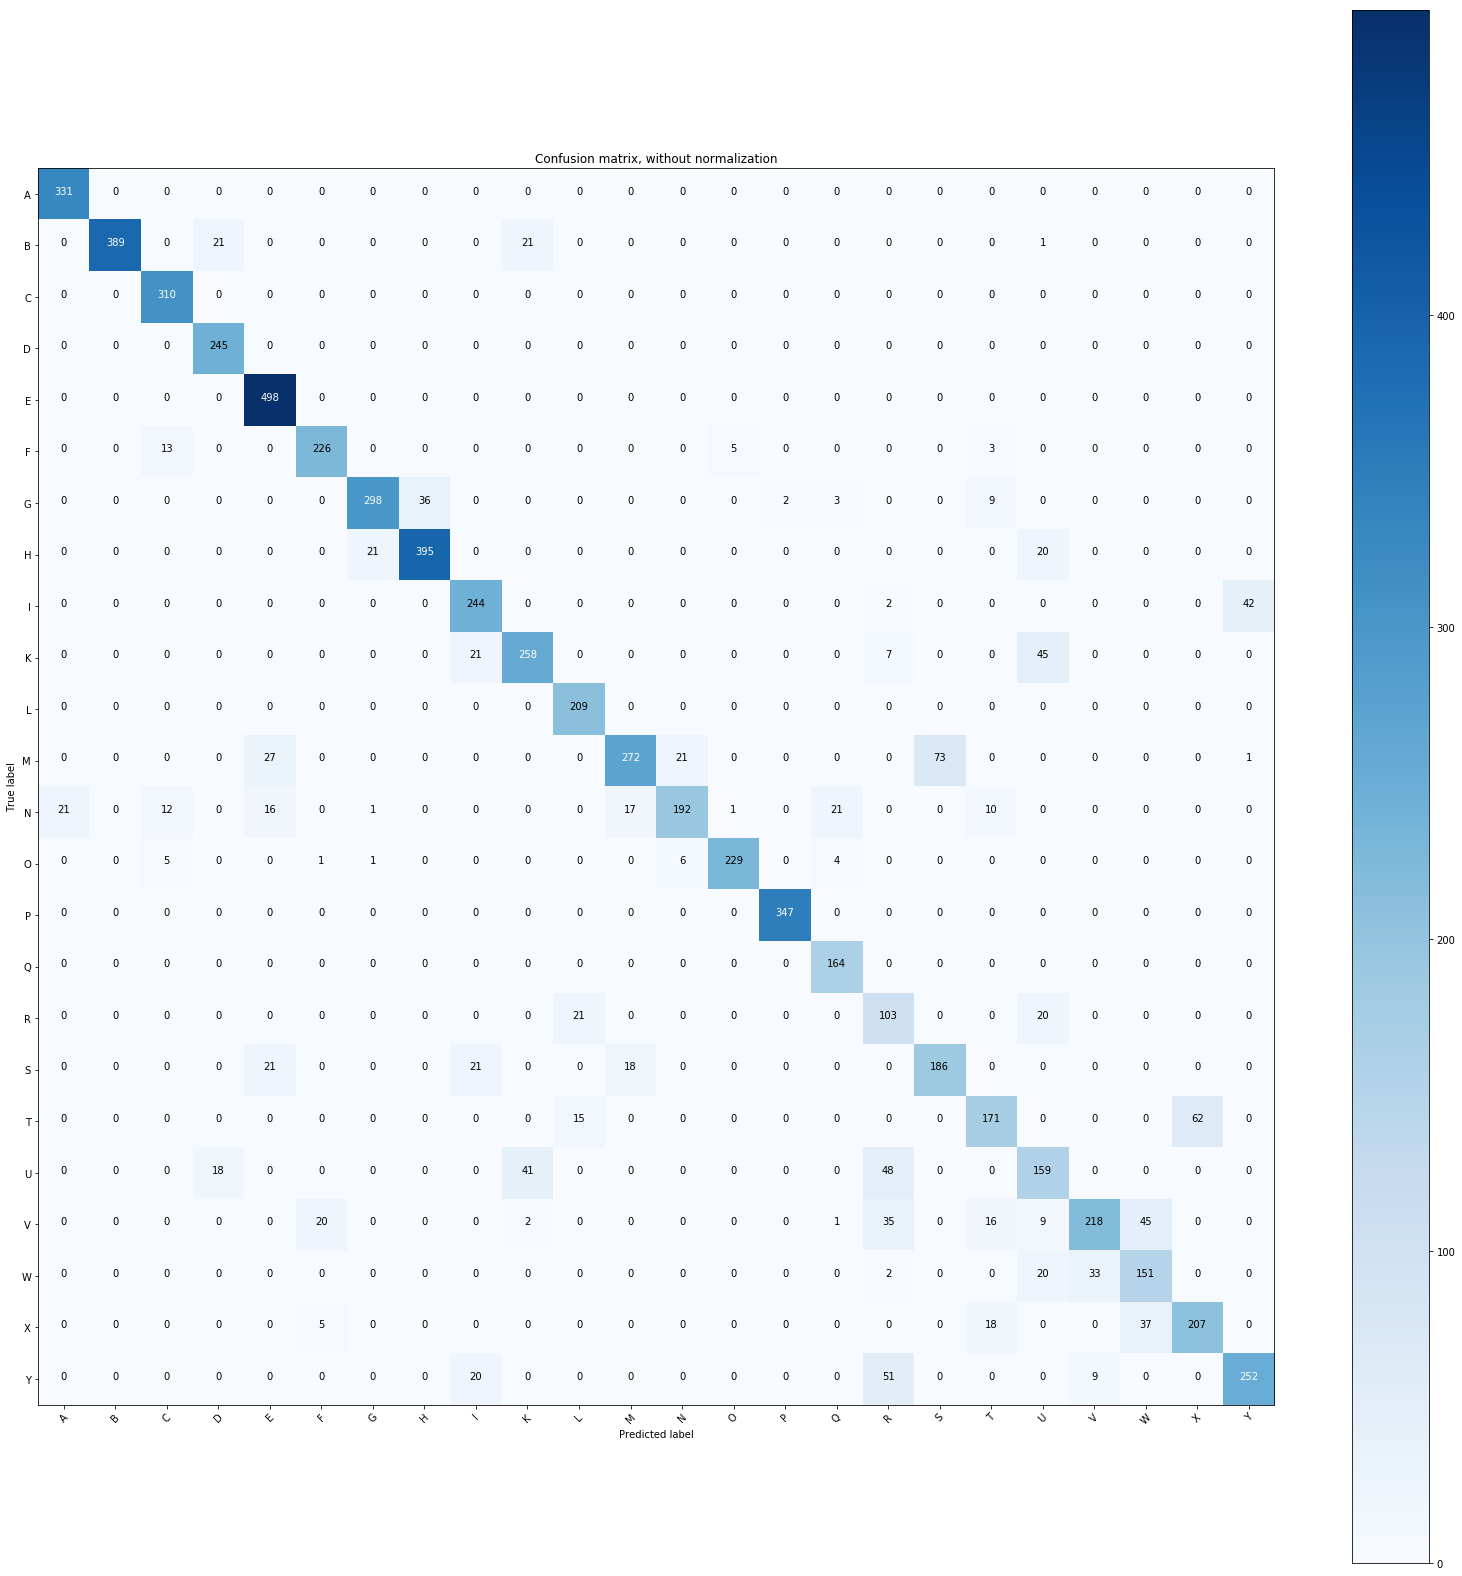

In [146]:
from sklearn.metrics import confusion_matrix
import itertools

# Codigo obtenido de documentacion de Scikit Learn 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cnf_matrix = confusion_matrix(y_t, Y_pred_test_final.argmax(axis=1), labels=None, sample_weight=None)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

letters= ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

plot_confusion_matrix(cnf_matrix, classes=letters, title='Confusion matrix, without normalization')
rcParams['figure.figsize'] = 22, 22
plt.show()

Podemos ver que existen varios casos donde falla el clasificador:

* Varias letras A fueron predichas como N, probablemente ya que ambas son gestos de puños y son parecidos
* Bastantes letras S fueron predichas como M, también ya que ambas son gestos de puños y son parecidos
* Confusión mutua entre las letras G y H, las cuales son gestos muy parecidos entre sí (un dedo horizontal versus dos dedos)
* Gran cantidad de Ts fueron interpretadas como X, probablemente ya que ambas muestran dedos doblados y en vista de lado
* Confusión mutua entre las letras V y W, las cuales son gestos muy parecidos entre sí (uno muestra dos dedos verticales, y el otro tres)
* Varias U que fueron interpretadas como K, debido a que ambas son puños mirando hacia la cámara, con uno o dos dedos en posición vertical

Sin embargo, la mayor parte de los datos fueron clasificados correctamente, por lo que según sea el uso de esta máquina, podría ser un desempeño aceptable.

## e) Clasificación mediante SVM no lineal

A continuación se intentará crear un clasificador por medio de una SVM (*Support Vector Machine*) no lineal. Citando la descripción dada en la pregunta anterior:

*"Éstas, en su forma lineal, van a intentar generar un hiperplano en el espacio de los datos, buscando maximizar un "márgen" (distancia entre puntos más cercanos entre un par de clases) al encontrar cuáles son los datos que son más relevantes para definir este márgen (los llamados vectores de soporte). Esto luego definirá un problema de optimización cuadrático, el cual se puede resolver con varias técnicas conocidas.

La búsqueda de una regresión lineal implica que se asume una relación lineal, sin embargo, mediante la técnica conocida como Kernel trick o el truco del Kernel, es posible hacer que la SVM pueda encontrar funciones no lineales que separan las clases al aplicar una matriz de Kernel a los datos, lo que los proyecta en un espacio de mayor dimensión donde sí existe un hiperplano. Esto se realiza al reemplazar los productos puntos de la formulación de SVM por las funciones de Kernel."* [SVM]

En este problema, a diferencia del anterior, existe un tema importante a considerar: el número de características es muy alto, y por lo tanto, el costo computacional de la SVM va a ser inaceptable. Por lo tanto, se hará un preprocesamiento con reducción de dimensionalidad, utilizando PCA con $30$ componentes a partir de los datos que fueron normalizados a $[0,1]$ anteriormente.

In [148]:
from sklearn.decomposition import PCA

sklearn_pca_temp = PCA(n_components=30)
pca_model_temp = sklearn_pca_temp.fit(X_train)
X_pca_train_temp = pd.DataFrame(pca_model_temp.transform(X_train))
X_pca_val_temp = pd.DataFrame(pca_model_temp.transform(X_val))
X_pca_test_temp = pd.DataFrame(pca_model_temp.transform(X_test))

X_pca_train_temp.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,...,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04,2.196400e+04
mean,-1.316557e-16,-4.498718e-18,1.630507e-16,1.214047e-16,1.335942e-16,1.285724e-16,1.507980e-16,-1.533557e-16,3.222523e-17,1.208689e-16,...,1.086213e-16,1.153618e-17,3.387181e-17,9.845622e-17,-4.012958e-17,-5.376347e-17,-1.332556e-17,7.254562e-17,5.621376e-17,-2.638574e-18
std,2.853518e+00,1.588618e+00,1.422992e+00,1.156356e+00,9.261527e-01,9.022836e-01,8.438124e-01,7.869883e-01,7.632686e-01,6.753798e-01,...,3.888405e-01,3.749452e-01,3.580460e-01,3.522154e-01,3.485538e-01,3.342583e-01,3.207945e-01,3.109171e-01,3.069957e-01,3.007203e-01
min,-8.937608e+00,-4.878293e+00,-4.858282e+00,-3.528148e+00,-3.318611e+00,-3.092734e+00,-3.585044e+00,-3.288438e+00,-3.602727e+00,-2.755008e+00,...,-1.439332e+00,-1.427851e+00,-1.518885e+00,-1.507082e+00,-1.375862e+00,-1.359213e+00,-1.277470e+00,-1.301629e+00,-1.181571e+00,-1.084488e+00
25%,-1.804947e+00,-1.053903e+00,-9.188677e-01,-8.800112e-01,-5.918806e-01,-5.999193e-01,-5.140122e-01,-4.952963e-01,-5.099922e-01,-4.442650e-01,...,-2.358455e-01,-2.446198e-01,-2.374138e-01,-2.123844e-01,-2.045377e-01,-2.192154e-01,-2.168513e-01,-2.104120e-01,-1.891908e-01,-2.014443e-01
50%,-1.736243e-01,-1.858806e-01,-2.209323e-03,-7.174485e-02,-7.147810e-02,-4.143229e-02,-6.470593e-03,-1.016509e-02,-2.459003e-02,-2.493275e-02,...,1.672574e-03,-7.754072e-03,-3.647425e-03,-6.895450e-03,6.744258e-03,-1.274013e-02,-1.945694e-03,-8.471139e-03,5.403853e-03,-3.335321e-03
75%,1.830703e+00,7.818902e-01,8.745784e-01,7.749136e-01,5.450199e-01,6.062867e-01,5.022608e-01,4.855272e-01,4.840686e-01,3.940880e-01,...,2.398559e-01,2.351124e-01,2.336079e-01,2.216899e-01,2.187535e-01,2.139377e-01,1.960783e-01,2.082429e-01,1.919300e-01,1.870345e-01
max,1.208431e+01,6.564882e+00,5.721576e+00,4.506852e+00,4.288826e+00,3.389770e+00,3.786152e+00,3.621761e+00,3.814937e+00,2.870583e+00,...,1.492240e+00,1.487053e+00,1.581585e+00,1.587226e+00,1.451950e+00,1.528982e+00,1.303975e+00,1.328050e+00,1.197914e+00,1.468710e+00


In [149]:
X_pca_train_temp.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.064121,-1.485517,0.915917,-0.530533,0.668269,0.982950,0.218839,-0.156926,-0.692562,1.350627,...,-0.006171,0.235239,0.359318,0.067879,-0.318696,-0.518345,0.091679,-0.186832,-0.056580,-0.029232
1,0.007989,-0.772769,0.584973,-0.645049,-0.914661,-1.093560,-1.595799,0.631336,-0.351715,0.511927,...,-0.386512,0.139687,-0.067140,-0.367750,0.753100,0.291503,-0.205700,-0.008628,-0.382240,0.088258
2,-2.070118,-0.329164,0.238895,1.367641,-0.711740,0.501168,-0.458850,-0.041051,1.617967,0.069576,...,-0.255352,0.122321,-0.132385,-0.071279,0.327235,-0.228444,-0.148546,0.178571,0.061938,-0.047658
3,4.868250,0.466868,4.333989,1.446688,-0.185790,0.107389,2.031496,0.899868,1.052336,2.178110,...,-1.008702,0.958086,0.857075,0.364879,-0.458650,0.823923,0.073071,0.437572,-0.255626,0.702774
4,-0.014576,-0.484073,-2.906545,0.059553,0.620340,-0.159915,0.058416,-0.283139,0.268051,-1.355713,...,0.098047,0.336343,0.014144,-0.051827,0.116676,0.114898,0.066811,-0.111450,0.266493,0.412046


Ahora aplicaremos un clasificador SVM:

In [150]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVR

model = SVC(verbose=30)
model.fit(X_pca_val_temp, y_v)
Y_pred_train = model.predict(X_pca_train_temp)
Y_pred_val = model.predict(X_pca_val_temp)
Y_pred_test = model.predict(X_pca_test_temp)

[LibSVM]

In [151]:
print("Score Train: ", model.score(X_pca_train_temp, y_tr))
print("Score Val: ", model.score(X_pca_val_temp, y_v))
print("Score Test: ", model.score(X_pca_test_temp, y_t))

Score Train:  0.899790566381
Score Val:  0.927517756329
Score Test:  0.778443948689


Utilizando los valores por defecto (C=1, gamma=0.1, Kernel Gaussiano) se logra un resultado bastante decente. A continuación se hará variar el parámetro C, con tal de permitir mayor holgura ante los outliers, y así quizás obtener fronteras de decisión que tengan más sentido (y por ende, mejor generalización). Al igual que antes, se verá el puntaje en el conjunto de validación, ya que en teoría, el conjunto de prueba debería ser desconocido.

In [22]:
model = SVC(verbose=30, C=10)
model.fit(X_pca_val_temp, y_v)
Y_pred_train = model.predict(X_pca_train_temp)
Y_pred_val = model.predict(X_pca_val_temp)
Y_pred_test = model.predict(X_pca_test_temp)

print("Score Train: ", model.score(X_pca_train_temp, y_tr))
print("Score Val: ", model.score(X_pca_val_temp, y_v))
print("Score Test: ", model.score(X_pca_test_temp, y_t))

[LibSVM]Score Train:  0.986432343835
Score Val:  0.997632489528
Score Test:  0.85331846068


In [23]:
model = SVC(verbose=30, C=10)
model.fit(X_pca_train_temp, y_tr)
Y_pred_train = model.predict(X_pca_train_temp)
Y_pred_val = model.predict(X_pca_val_temp)
Y_pred_test = model.predict(X_pca_test_temp)

print("Score Train: ", model.score(X_pca_train_temp, y_tr))
print("Score Val: ", model.score(X_pca_val_temp, y_v))
print("Score Test: ", model.score(X_pca_test_temp, y_t))

[LibSVM]Score Train:  0.999954470952
Score Val:  1.0
Score Test:  0.867122141662


In [24]:
model = SVC(verbose=30, C=100)
model.fit(X_pca_train_temp, y_tr)
Y_pred_train = model.predict(X_pca_train_temp)
Y_pred_val = model.predict(X_pca_val_temp)
Y_pred_test = model.predict(X_pca_test_temp)

print("Score Train: ", model.score(X_pca_train_temp, y_tr))
print("Score Val: ", model.score(X_pca_val_temp, y_v))
print("Score Test: ", model.score(X_pca_test_temp, y_t))

[LibSVM]Score Train:  1.0
Score Val:  1.0
Score Test:  0.86544896821


A continuación se hará un Grid Search con Cross Validation con K=2 folds para encontrar el mejor valor de gamma y el mejor valor de C. Se utilizará como conjunto de entrenamiento el de validación.

In [29]:
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.model_selection import GridSearchCV

#parameters = {'C':[0.01, 0.1, 1, 10, 100], 'loss': ['hinge', 'squared_hinge'], 'dual': [True,False] }
parameters = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.1, 1, 10, 100] }
clf = GridSearchCV(SVC(verbose=30, C=100), parameters, verbose=10, n_jobs=4, cv=2)
clf.fit(X_pca_val_temp, y_v)
tree_model_cv = clf.best_estimator_
print ("Mejores params:", clf.best_params_)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    6.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    9.4s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   13.6s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   18.1s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   23.7s
[Parallel(n_jobs=4)]: Done  46 out of  48 | elapsed:   30.3s remaining:    1.2s
[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:   31.3s finished


[LibSVM]Mejores params: {'C': 100, 'gamma': 0.01}


Finalmente obtenemos este clasificador, que tiene tan buen rendimiento como la red neuronal artificial del punto anterior.

In [154]:
model = SVC(verbose=30, C=100, gamma=0.01)
model.fit(X_pca_train_temp, y_tr)
Y_pred_train_pca = model.predict(X_pca_train_temp)
Y_pred_val_pca = model.predict(X_pca_val_temp)
Y_pred_test_pca = model.predict(X_pca_test_temp)

print("Score Train: ", model.score(X_pca_train_temp, y_tr))
print("Score Val: ", model.score(X_pca_val_temp, y_v))
print("Score Test: ", model.score(X_pca_test_temp, y_t))

[LibSVM]Score Train:  1.0
Score Val:  1.0
Score Test:  0.850250976018


Confusion matrix, without normalization


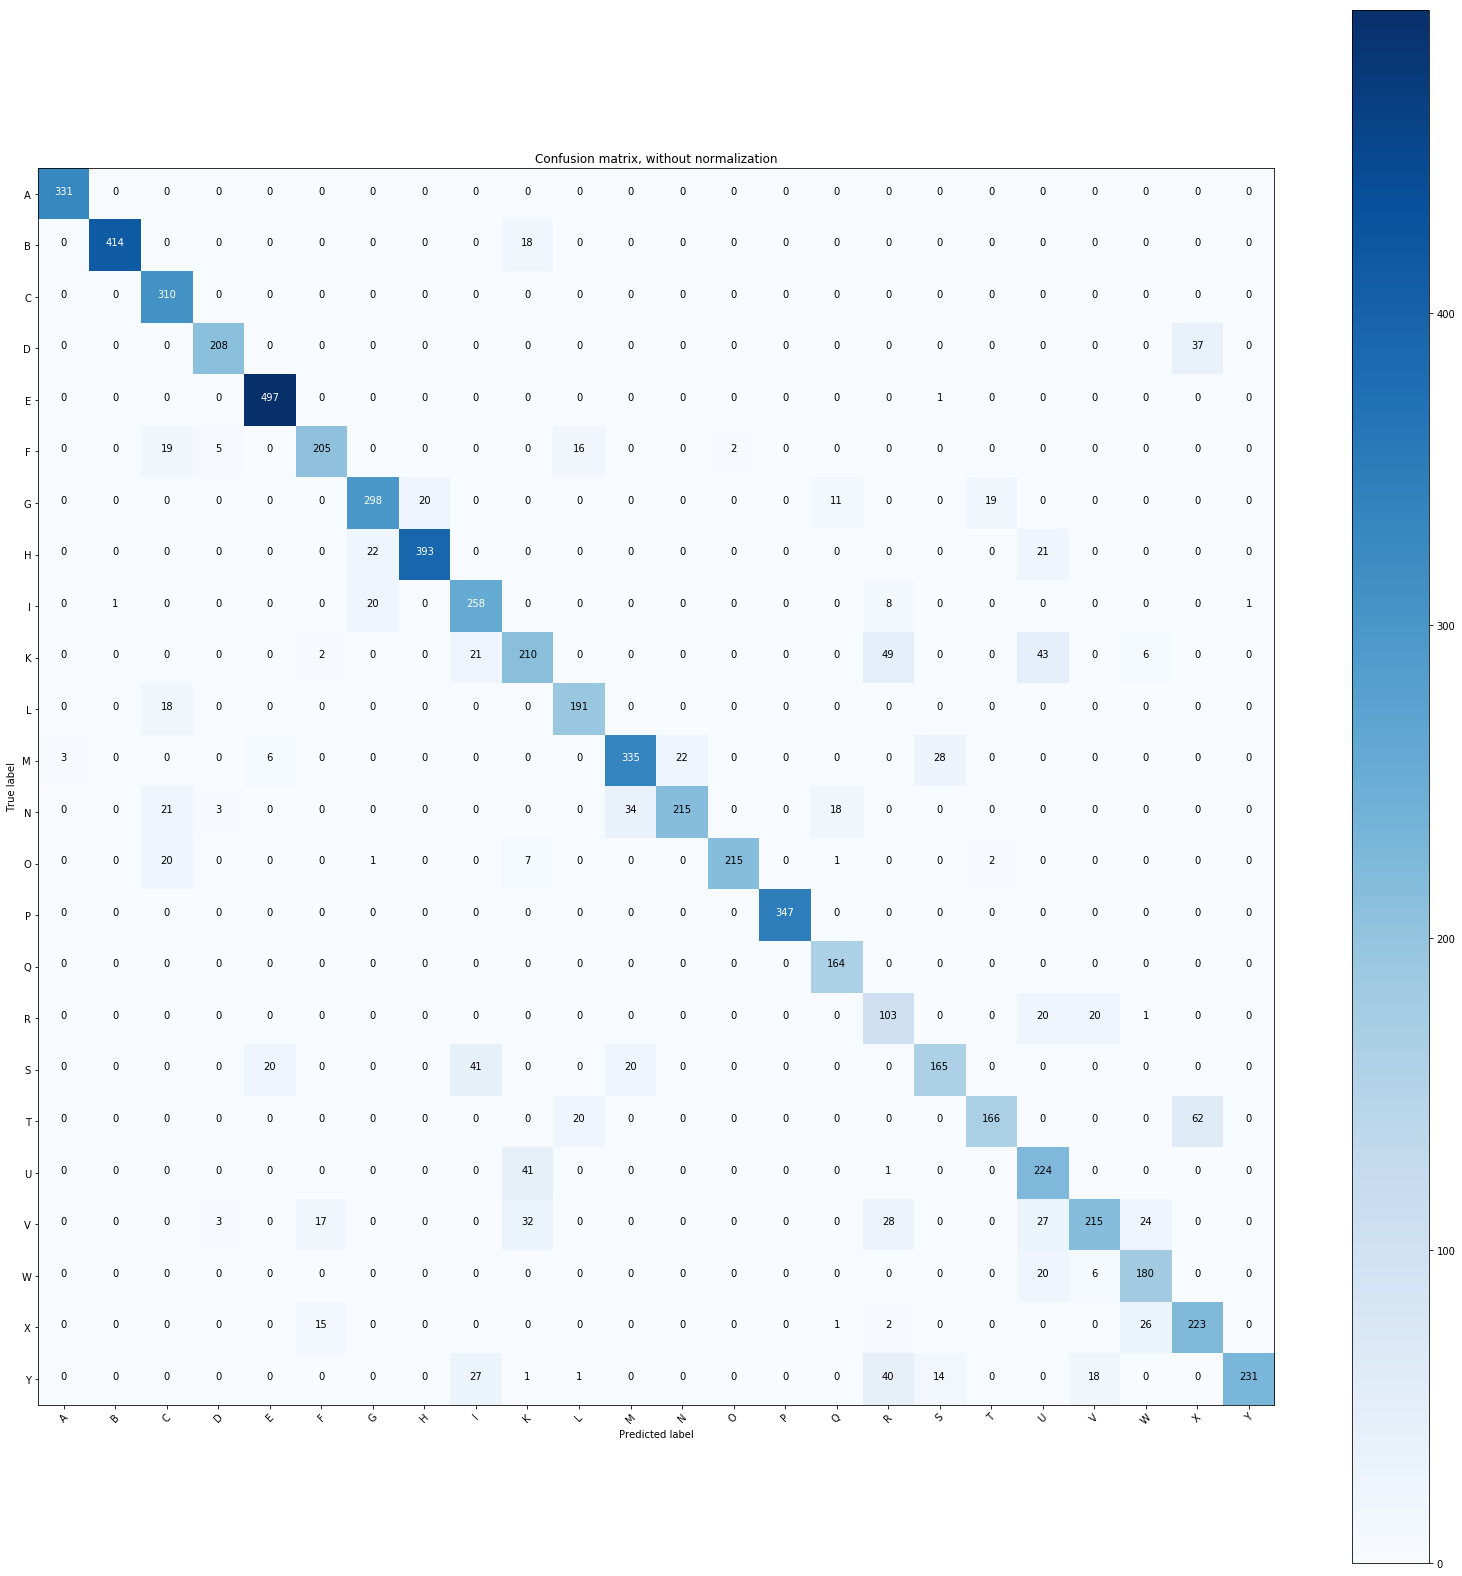

In [155]:
cnf_matrix = confusion_matrix(y_t, Y_pred_test_pca, labels=None, sample_weight=None)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

letters= ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

plot_confusion_matrix(cnf_matrix, classes=letters, title='Confusion matrix, without normalization')
rcParams['figure.figsize'] = 22, 22
plt.show()

Si bien este modelo presenta un puntaje parecido al del MLP, los errores de clasificación siguen algunos patrones distintos. Por ejemplo, la red neuronal entregaba varias letras U y V como R, pero en el clasificador SVM estas letras son mal clasificadas como K en la mayoría de los casos, y sólo V tiene una cantidad considerable de malas clasificaciones como R.

La clasificación de U y V como K tiene algo de sentido, ya que todos estos gestos son puños mirando hacia la cámara con dos dedos afuera.

## f) Clasificación mediante Árbol de Clasificación

Ahora se intentará crear un modelo de clasificación utilizando un Árbol de Decisión. Se harán las pruebas usando varios tipos de representaciones hechos anteriormente: sin preprocesamiento, con preprocesamiento de escalado y estandarización, y finalmente utilizando las 30 componentes entregadas por PCA en la reducción de dimensionalidad.

### Sin reducción de dimensionalidad

In [37]:
from sklearn.tree import DecisionTreeClassifier as Tree

model_tree_default = Tree(random_state=0) # Arbol por defecto
model_tree_default.fit(df_train_std, y_tr)
Y_pred_train = model_tree_default.predict(df_train_std)
Y_pred_val = model_tree_default.predict(df_val_std)
Y_pred_test = model_tree_default.predict(df_test_std)

print("Score Train: ", model_tree_default.score(df_train_std, y_tr))
print("Score Val: ", model_tree_default.score(df_val_std, y_v))
print("Score Test: ", model_tree_default.score(df_test_std, y_t))

Score Train:  1.0
Score Val:  0.875978874522
Score Test:  0.458170663692


In [38]:
model_tree_default

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Utilizando los datos por defecto no se logra una buena clasificación en el conjunto de pruebas, pero sí en los otros dos conjuntos. Existe un riesgo de sobreajuste, por lo que se hará un Grid Search con Cross Validation para buscar mejores parámetros.

Al igual que en la pregunta anterior, se van a variar los siguientes parámetros:

* *max_depth*, la máxima profundidad del árbol.
* *min_samples_leaf*, el número mínimo de datos de entrenamiento que deben estar en un nodo para que éste pueda generar un *split* o corte hacia 2 nodos hijos.
* *min_samples_split*, el número mínimo de datos de entrenamiento que deben estar en un nodo terminal u hoja.

In [23]:
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[10, 20, 50, 200, None], 'min_samples_split': [5,10,15,20,50,100], 'min_samples_leaf': [5,10,15,20,50,100] }
clf = GridSearchCV(Tree(random_state=0), parameters, verbose=10, n_jobs=4, cv=2)
clf.fit(df_val_std, y_v)
tree_model_cv = clf.best_estimator_
print ("Mejores params:", clf.best_params_)

Fitting 2 folds for each of 180 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   10.1s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   12.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   15.3s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.9s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   20.7s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   23.1s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:   27.7s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   32.5s
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:   37.8s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   42.5s
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:   46.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   52.2s
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:   59.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Do

Mejores params: {'max_depth': 50, 'min_samples_leaf': 5, 'min_samples_split': 5}


Se hará una segunda búsqueda utilizando valores cercanos a los obtenidos en el GSCV anterior.

In [26]:
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[20, 35, 50, 60], 'min_samples_split': [2,3,4,5,6,7,8], 'min_samples_leaf': [2,3,4,5,6,7,8] }
clf = GridSearchCV(Tree(random_state=0), parameters, verbose=10, n_jobs=4, cv=2)
clf.fit(df_val_std, y_v)
tree_model_cv = clf.best_estimator_
print ("Mejores params:", clf.best_params_)

Fitting 2 folds for each of 196 candidates, totalling 392 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    8.2s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   11.9s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   15.2s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   19.2s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   23.2s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   28.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   32.6s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:   38.1s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   43.5s
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:   50.2s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   57.9s
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Do

Mejores params: {'max_depth': 35, 'min_samples_leaf': 2, 'min_samples_split': 6}


Utilizando estos parámetros, se probarán tres modelos con distintos parámetros, y cada modelo será probado con y sin los datos pre-procesados.

In [47]:
# Modelo GSCV1
# Datos sin preprocesamiento
model = Tree(random_state=0, max_depth=50, min_samples_leaf=5, min_samples_split=5)
model.fit(x_tr, y_tr)
Y_pred_train = model.predict(x_tr)
Y_pred_val = model.predict(x_v)
Y_pred_test = model.predict(x_t)

print("Score Train: ", model.score(x_tr, y_tr))
print("Score Val: ", model.score(x_v, y_v))
print("Score Test: ", model.score(x_t, y_t))

Score Train:  0.931342196321
Score Val:  0.83081405937
Score Test:  0.442136084774


In [36]:
# Modelo GSCV1
# Datos con preprocesamiento
model = Tree(random_state=0, max_depth=50, min_samples_leaf=5, min_samples_split=5)
model.fit(df_train_std, y_tr)
Y_pred_train = model.predict(df_train_std)
Y_pred_val = model.predict(df_val_std)
Y_pred_test = model.predict(df_test_std)

print("Score Train: ", model.score(df_train_std, y_tr))
print("Score Val: ", model.score(df_val_std, y_v))
print("Score Test: ", model.score(df_test_std, y_t))

Score Train:  0.931342196321
Score Val:  0.83044982699
Score Test:  0.442554378137


In [43]:
# Modelo GSCV2
# Datos sin preprocesamiento
model = Tree(random_state=0, max_depth=35, min_samples_leaf=2, min_samples_split=6)
model.fit(x_tr, y_tr)
Y_pred_train = model.predict(x_tr)
Y_pred_val = model.predict(x_v)
Y_pred_test = model.predict(x_t)

print("Score Train: ", model.score(x_tr, y_tr))
print("Score Val: ", model.score(x_v, y_v))
print("Score Test: ", model.score(x_t, y_t))

Score Train:  0.966991440539
Score Val:  0.853760699326
Score Test:  0.439068600112


In [33]:
# Modelo GSCV2
# Datos con preprocesamiento
model = Tree(random_state=0, max_depth=35, min_samples_leaf=2, min_samples_split=6)
model.fit(df_train_std, y_tr)
Y_pred_train = model.predict(df_train_std)
Y_pred_val = model.predict(df_val_std)
Y_pred_test = model.predict(df_test_std)

print("Score Train: ", model.score(df_train_std, y_tr))
print("Score Val: ", model.score(df_val_std, y_v))
print("Score Test: ", model.score(df_test_std, y_t))

Score Train:  0.966991440539
Score Val:  0.852850118376
Score Test:  0.439486893475


In [42]:
# Modelo GSCV3
# Datos sin preprocesamiento
model = Tree(random_state=0, max_depth=20, min_samples_leaf=5, min_samples_split=5)
model.fit(x_tr, y_tr)
Y_pred_train = model.predict(x_tr)
Y_pred_val = model.predict(x_v)
Y_pred_test = model.predict(x_t)

print("Score Train: ", model.score(x_tr, y_tr))
print("Score Val: ", model.score(x_v, y_v))
print("Score Test: ", model.score(x_t, y_t))

Score Train:  0.917273720634
Score Val:  0.820797668913
Score Test:  0.436001115449


In [39]:
# Modelo GSCV3
# Datos con preprocesamiento
model = Tree(random_state=0, max_depth=20, min_samples_leaf=5, min_samples_split=5)
model.fit(df_train_std, y_tr)
Y_pred_train = model.predict(df_train_std)
Y_pred_val = model.predict(df_val_std)
Y_pred_test = model.predict(df_test_std)

print("Score Train: ", model.score(df_train_std, y_tr))
print("Score Val: ", model.score(df_val_std, y_v))
print("Score Test: ", model.score(df_test_std, y_t))

Score Train:  0.917273720634
Score Val:  0.820069204152
Score Test:  0.436279977691


Finalmente ningún árbol logra un buen rendimiento en el conjunto de pruebas. Es posible que la gran cantidad de características sea un problema, por lo que ahora se pasará a construír árboles utilizando las 30 características dadas por PCA.

### Usando reducción de dimensionalidad

In [32]:
from sklearn.tree import DecisionTreeClassifier as Tree

model_tree_default = Tree(random_state=0) # Arbol por defecto
model_tree_default.fit(X_pca_train_temp, y_tr)
Y_pred_train = model_tree_default.predict(X_pca_train_temp)
Y_pred_val = model_tree_default.predict(X_pca_val_temp)
Y_pred_test = model_tree_default.predict(X_pca_test_temp)

print("Score Train: ", model_tree_default.score(X_pca_train_temp, y_tr))
print("Score Val: ", model_tree_default.score(X_pca_val_temp, y_v))
print("Score Test: ", model_tree_default.score(X_pca_test_temp, y_t))

Score Train:  1.0
Score Val:  0.955745765799
Score Test:  0.455242610151


Se obtuvo un puntaje ligeramente mejor, pero será necesario hacer otro Grid Search CV para buscar parámetros que nos eviten el sobreajuste y una mejora en el puntaje de pruebas.

In [35]:
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[10, 20, 30, 35, 40, 50, 60, 100, 200], 'min_samples_split': [2,3,4,5,6,7,8,10,30,50], 'min_samples_leaf': [2,3,4,5,6,7,8,10,30,50] }
clf = GridSearchCV(Tree(random_state=0), parameters, verbose=10, n_jobs=4, cv=3)
clf.fit(X_pca_val_temp, y_v)
tree_model_cv = clf.best_estimator_
print ("Mejores params:", clf.best_params_)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    6.4s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    6.8s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    7.3s
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:    7.8s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    8.3s
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:    9.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    9.6s
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:   10.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   10.9s
[Parallel(n_jobs=4)]: Do

Mejores params: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [36]:
model_tree_default = Tree(random_state=0, max_depth=30, min_samples_leaf=2, min_samples_split=2)
model_tree_default.fit(X_pca_train_temp, y_tr)
Y_pred_train = model_tree_default.predict(X_pca_train_temp)
Y_pred_val = model_tree_default.predict(X_pca_val_temp)
Y_pred_test = model_tree_default.predict(X_pca_test_temp)

print("Score Train: ", model_tree_default.score(X_pca_train_temp, y_tr))
print("Score Val: ", model_tree_default.score(X_pca_val_temp, y_v))
print("Score Test: ", model_tree_default.score(X_pca_test_temp, y_t))

Score Train:  0.988708796212
Score Val:  0.945000910581
Score Test:  0.455382041272


Con este conjunto de parámetros se evita un poco el sobreajuste, pero el puntaje de pruebas no mejora. Lamentablemente, se tendrá que concluír que un árbol de decisión no será capaz de resolver este problema. Para finalizar, se intentará utiizar un algoritmo de ensamblado de árboles de decisión: Random Forest.

### Usando Random Forest

In [156]:
from sklearn.ensemble import RandomForestClassifier

# Con reduccion de dimensionalidad

model_rf_pca = RandomForestClassifier(random_state=0)
model_rf_pca.fit(X_pca_train_temp, y_tr)
Y_pred_train = model_rf_pca.predict(X_pca_train_temp)
Y_pred_val = model_rf_pca.predict(X_pca_val_temp)
Y_pred_test = model_rf_pca.predict(X_pca_test_temp)

print("Score Train: ", model_rf_pca.score(X_pca_train_temp, y_tr))
print("Score Val: ", model_rf_pca.score(X_pca_val_temp, y_v))
print("Score Test: ", model_rf_pca.score(X_pca_test_temp, y_t))

Score Train:  1.0
Score Val:  0.99963576762
Score Test:  0.686419408812


In [157]:
# Datos sin preprocesamiento

model_rf_default = RandomForestClassifier(random_state=0)
model_rf_default.fit(x_tr, y_tr)
Y_pred_train = model_rf_default.predict(x_tr)
Y_pred_val = model_rf_default.predict(x_v)
Y_pred_test = model_rf_default.predict(x_t)

print("Score Train: ", model_rf_default.score(x_tr, y_tr))
print("Score Val: ", model_rf_default.score(x_v, y_v))
print("Score Test: ", model_rf_default.score(x_t, y_t))

Score Train:  0.999908941905
Score Val:  0.982516845748
Score Test:  0.658533184607


In [45]:
# Datos con preprocesamiento

model_rf_std = RandomForestClassifier(random_state=0)
model_rf_std.fit(df_train_std, y_tr)
Y_pred_train = model_rf_std.predict(df_train_std)
Y_pred_val = model_rf_std.predict(df_val_std)
Y_pred_test = model_rf_std.predict(df_test_std)

print("Score Train: ", model_rf_std.score(df_train_std, y_tr))
print("Score Val: ", model_rf_std.score(df_val_std, y_v))
print("Score Test: ", model_rf_std.score(df_test_std, y_t))

Score Train:  0.999954470952
Score Val:  0.981970497177
Score Test:  0.658672615728


Se obtienen puntajes mejores a los dados por los árboles individuales, dando superioridad al trabajo con los datos transformados con PCA. Sin embargo, un puntaje de $\approx0.65$ sigue siendo débil. Se procederá a hacer un Grid Search CV con K=3, usando el conjunto de validación transformado con PCA.

In [48]:
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [5,10,30,50], 'max_depth':[10, 30, 50, 100], 'criterion':['gini', 'entropy'], 'min_samples_split': [2,5,10,50], 'min_samples_leaf': [2,5,10,50] }
clf = GridSearchCV(RandomForestClassifier(random_state=0), parameters, verbose=10, n_jobs=4, cv=3)
clf.fit(X_pca_val_temp, y_v)
tree_model_cv = clf.best_estimator_
print ("Mejores params:", clf.best_params_)



Fitting 3 folds for each of 512 candidates, totalling 1536 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    5.7s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    6.5s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    7.5s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    8.4s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    9.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   10.8s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:   12.2s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   13.6s
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:   15.2s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   16.6s
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:   18.3s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   19.8s
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:   21.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   23.3s
[Parallel(n_jobs=4)]: Do

Mejores params: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [51]:
parameters = {'n_estimators': [30,40,50,50], 'max_depth':[20, 30, 40], 'min_samples_split': [2,3,5], 'min_samples_leaf': [2,3,5] }
clf = GridSearchCV(RandomForestClassifier(random_state=0, criterion='entropy'), parameters, verbose=10, n_jobs=4, cv=3)
clf.fit(X_pca_val_temp, y_v)
tree_model_cv = clf.best_estimator_
print ("Mejores params:", clf.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    7.6s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   12.5s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   18.6s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   25.5s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   34.2s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   43.6s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   54.8s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Do

Mejores params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [161]:
# Con reduccion de dimensionalidad y Parametros del GSCV

model_rf_std = RandomForestClassifier(random_state=0, criterion='entropy', max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50)
model_rf_pca.fit(X_pca_train_temp, y_tr)
Y_pred_train_rf = model_rf_pca.predict(X_pca_train_temp)
Y_pred_val_rf = model_rf_pca.predict(X_pca_val_temp)
Y_pred_test_rf = model_rf_pca.predict(X_pca_test_temp)

print("Score Train: ", model_rf_pca.score(X_pca_train_temp, y_tr))
print("Score Val: ", model_rf_pca.score(X_pca_val_temp, y_v))
print("Score Test: ", model_rf_pca.score(X_pca_test_temp, y_t))

Score Train:  1.0
Score Val:  0.99963576762
Score Test:  0.686419408812


Confusion matrix, without normalization


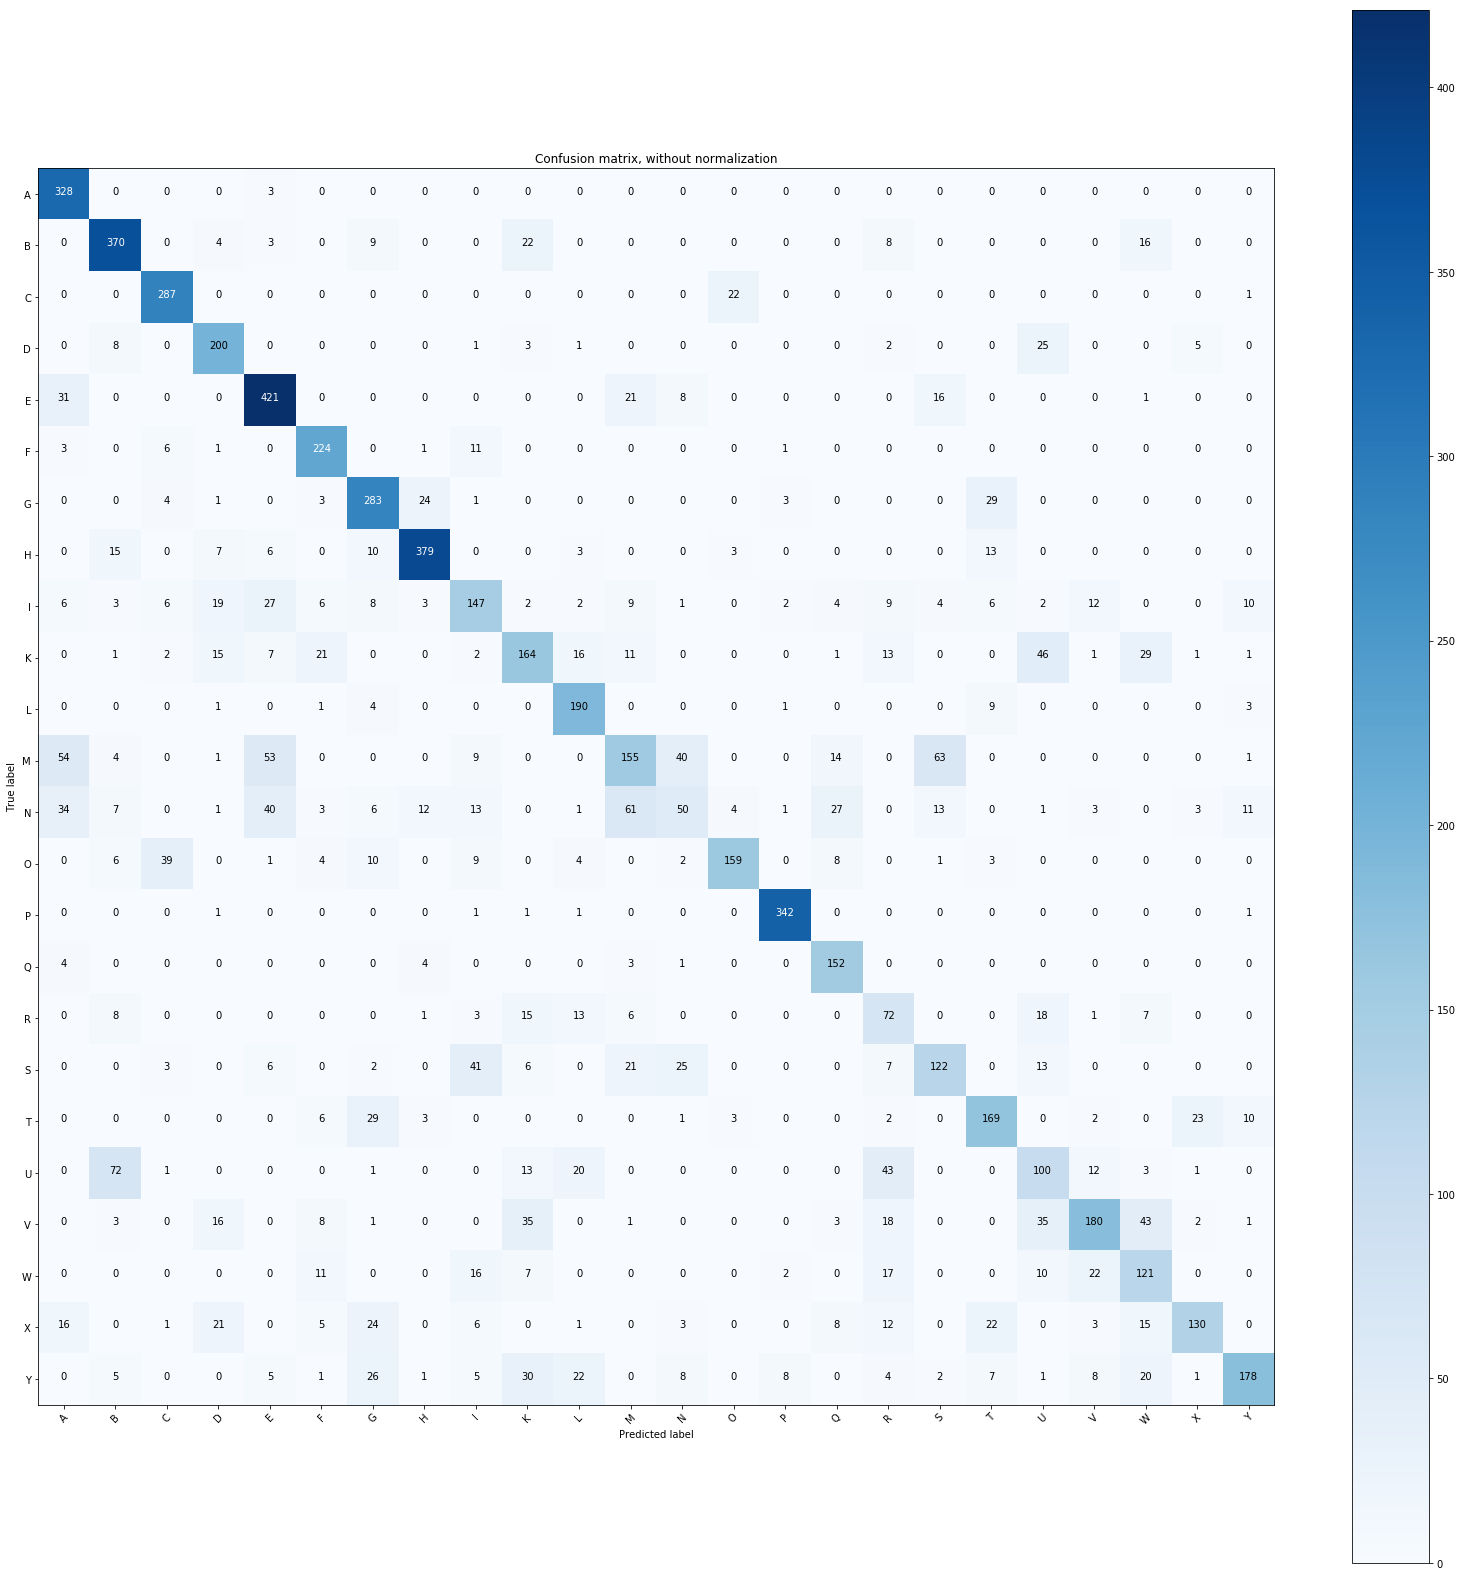

In [162]:
cnf_matrix = confusion_matrix(y_t, Y_pred_test_rf, labels=None, sample_weight=None)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

letters= ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

plot_confusion_matrix(cnf_matrix, classes=letters, title='Confusion matrix, without normalization')
rcParams['figure.figsize'] = 22, 22
plt.show()

Finalmente se obtiene un modelo con clasificación casi perfecta de los datos de entrenamiento y validación, pero un error de pruebas superior al 30%. Los errores en la matriz de confusión reflejan errores parecidos a los de los modelos anteriores, pero se agregan bastantes más. Un dato interesante es la mala clasificación de la letra N, que tiene más errores de clasificación que aciertos. Esta letra se representa con un puño, que es un gesto parecido al de otras letras como A, E, M y S.

Como conclusiones de este problema, se pudo demostrar experimentalmente la eficacia de las redes neuronales artificiales y las SVM para problemas de clasificación de imágenes, pero como en todos los problemas de máquinas de aprendizaje, se tienen que tener en cuenta las transformaciones y representaciones de los datos de entrada. Lamentablemente los modelos basados en árboles de decisión llegaron a tener un gran sobreajuste, creando un modelo que si bien clasifica y aprende los datos de entrenamiento, falla en el objetivo de predecir las clases o etiquetas de nuevos datos, y por ende, termina siendo descartada en este tipo de problemas. Vale mencionar que el ensamblado de árboles llega a dar una mejora notable, pero no suficiente.

# Conclusiones generales

Los modelos no lineales pueden abrir paso a poder realizar clasificadores y regresores mucho mejores que los métodos lineales, pero aún así se deben tomar en cuenta varias de las mismas precauciones que se deben seguir con las máquinas de aprendizaje convencionales. Por ejemplo, en el caso de SVMs, el costo computacional de una SVM con Kernel Gaussiano es mayor al de una SVM lineal. El ajuste de hiperparámetros también es esencial, ya que el uso de modelos no lineales nos puede llevar a modelos que son excelentes con el conjunto de entrenamiento, pero el riesgo de sobreajuste aumenta.

A lo largo de estos problemas se trabajaron con varias de las nuevas tendencias del área, como son las redes neuronales artificiales y los ensamblados de máquinas. Si bien sus resultados pueden ser muy buenos, no hay que olvidar todas las suposiciones matemáticas que se tienen por detrás (como la distribución de los datos o la representación de las etiquetas), y en estos casos, el ajuste de muchos más hiperparámetros que con otros modelos. Por lo tanto, es necesario saber el tipo de problema que se está tratando, revisar la literatura y encontrar la forma correcta en que se debe abordar. Así como, por ejemplo, los árboles de clasificación y ciertas otras máquinas tienen problemas con aplicaciones de imágenes, las redes neuronales artificiales y las SVMs también si es que no se utilizan los hiperparámetros correctos, y las representaciones correctas. Al fin y al cabo, estos modelos se basan en poder aprender de las entradas, pero con tantos tipos de problemas posibles, la representación y la forma de trabajar es importante.

# Referencias

* [Standadization] Scikit Learn. Standardization, or mean removal and variance scaling. Obtenido de http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler

* [MLP] M. Riedmiller. Multilayer Perceptron. Obtenido de http://ml.informatik.uni-freiburg.de/former/_media/teaching/ss10/05_mlps.printer.pdf

* [SVM] R. Berwick. An idiot guide's to SVMs. Obtenido de http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf